In [1]:
#1

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#2

customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
#3

display(customer_df.shape)
'\n'
'\n'
'\n'
display(customer_df.info())
'\n'
'\n'
'\n'
customer_df.head()

(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
#4

customer_df.columns = customer_df.columns.str.lower()
customer_df.columns = customer_df.columns.str.replace(' ','_')
customer_df= customer_df.rename(columns = {'employmentstatus':'employment_status'})

In [5]:
#5

import time
from datetime import date 

type(customer_df['effective_to_date'][0])

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors = 'coerce')

type(customer_df['effective_to_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
#6

customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [7]:
import numpy as np


In [8]:
#7

def return_numerical_df_categorical_df2(customer_df):
    categorical_df = customer_df.select_dtypes(['object'])
    numerical_df = customer_df.select_dtypes([np.number])
    return categorical_df, numerical_df

In [9]:
categorical_df, numerical_df = return_numerical_df_categorical_df2(customer_df)

In [10]:
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [11]:
categorical_df

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [12]:
#8

categorical_df = categorical_df.drop(['customer'],axis = 1)
categorical_df


,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [13]:
#9

# pairs with the highest correlation: 'total_claim_amount'/'monthly premium auto'
# Comment: It makes sense that these two are the highest correlation pair since the clients that pay more by month for them
    #car insurance are expected to be the ones that  claim the highest values
numerical_df.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [14]:
#10

def return_discrete_continous(x, count_nunique = 36):
    copy = x.copy()
    cont_disc_columns = pd.DataFrame(copy.nunique()>count_nunique)
    list_continous = list(cont_disc_columns[cont_disc_columns[0]==True].T.columns)
    list_discretes = list(cont_disc_columns[cont_disc_columns[0]==False].T.columns)
    numerical_continous = copy.drop(list_discretes, axis = 1)
    numerical_discretes = copy.drop(list_continous, axis = 1)
    return numerical_continous, numerical_discretes
    

In [15]:
numerical_continous, numerical_discretes = return_discrete_continous(numerical_df)

In [16]:
#11

def bar_plots_discrete(x):
    for y in x.columns:
        fig, ax = plt.subplots (figsize = (16,16))
        sns.barplot(x = y, data =x )
    return plt.show()
    

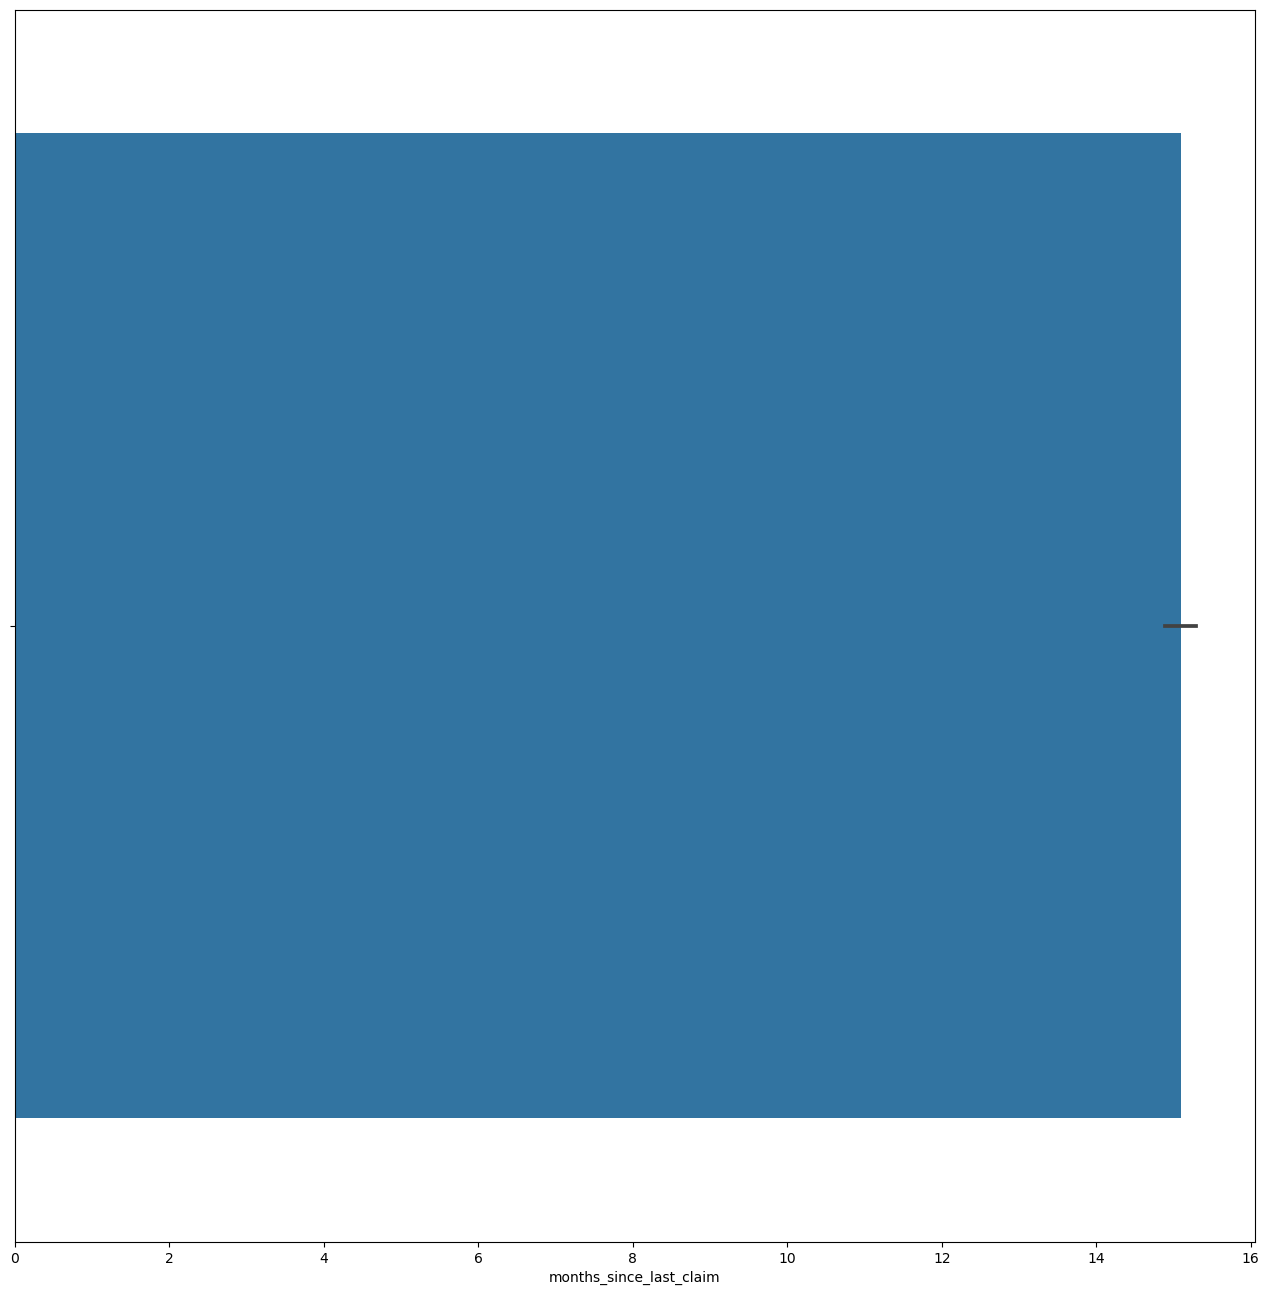

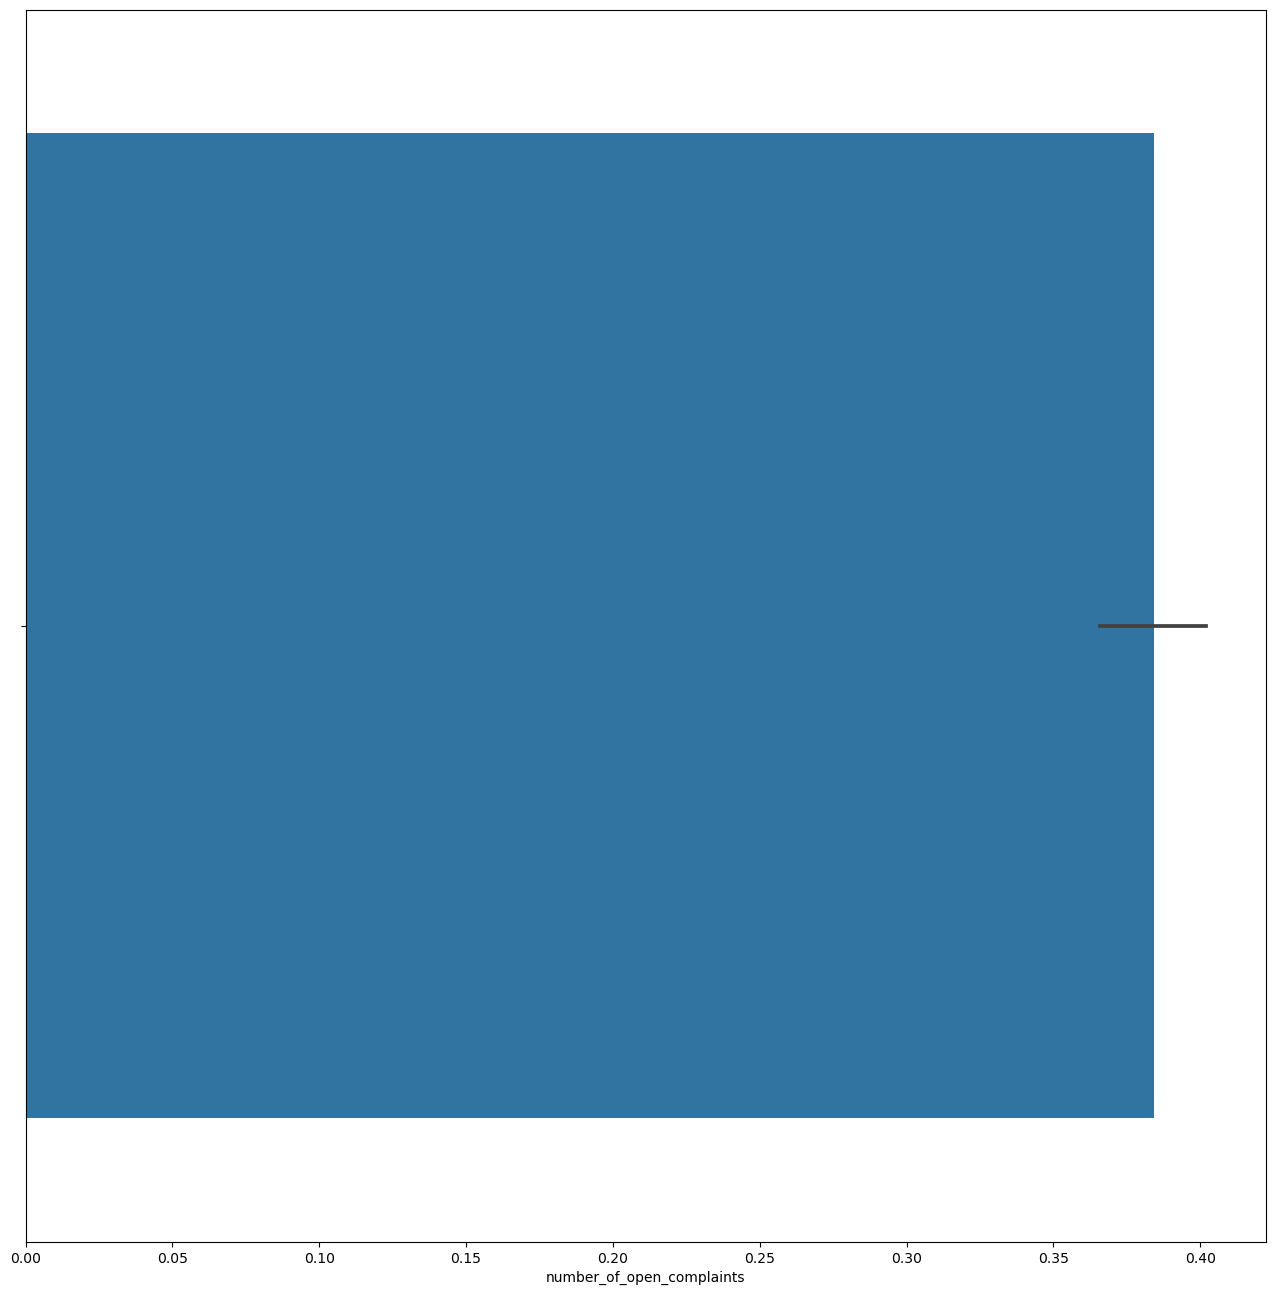

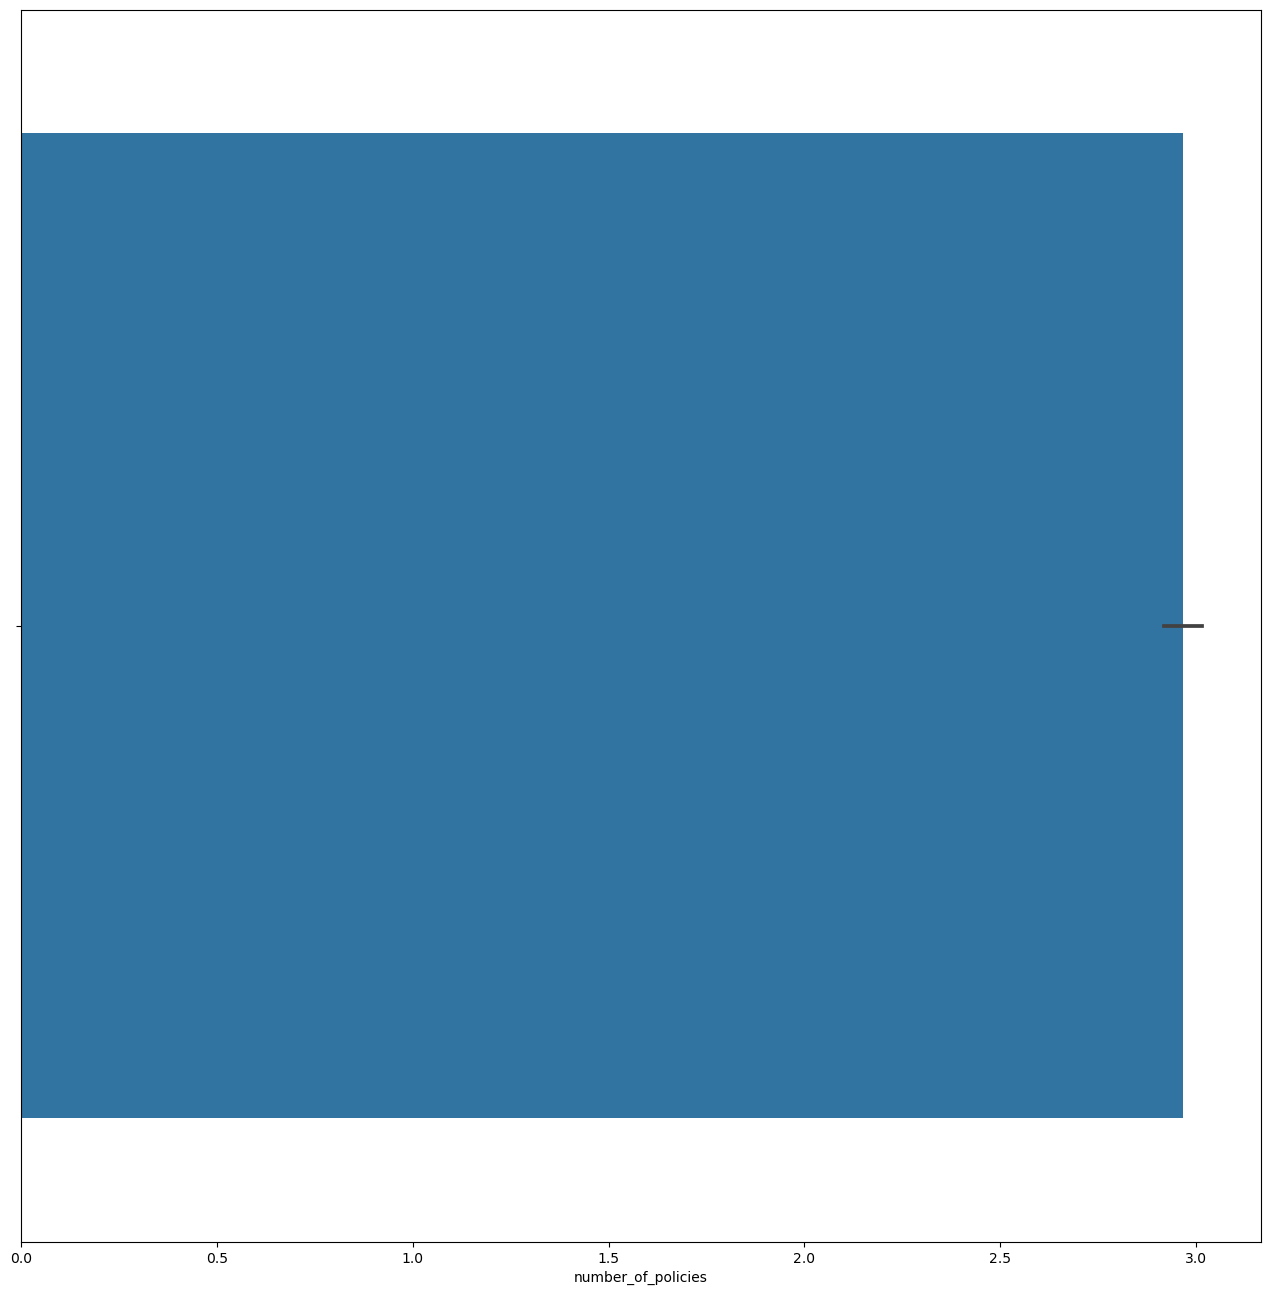

In [17]:
bar_plots_discrete(numerical_discretes)

In [18]:
#12

def hist_plots_continous(x):
    for y in x.columns:
        fig, ax = plt.subplots (figsize = (16,16))
        sns.histplot(x = y, data =x )
    return plt.show()

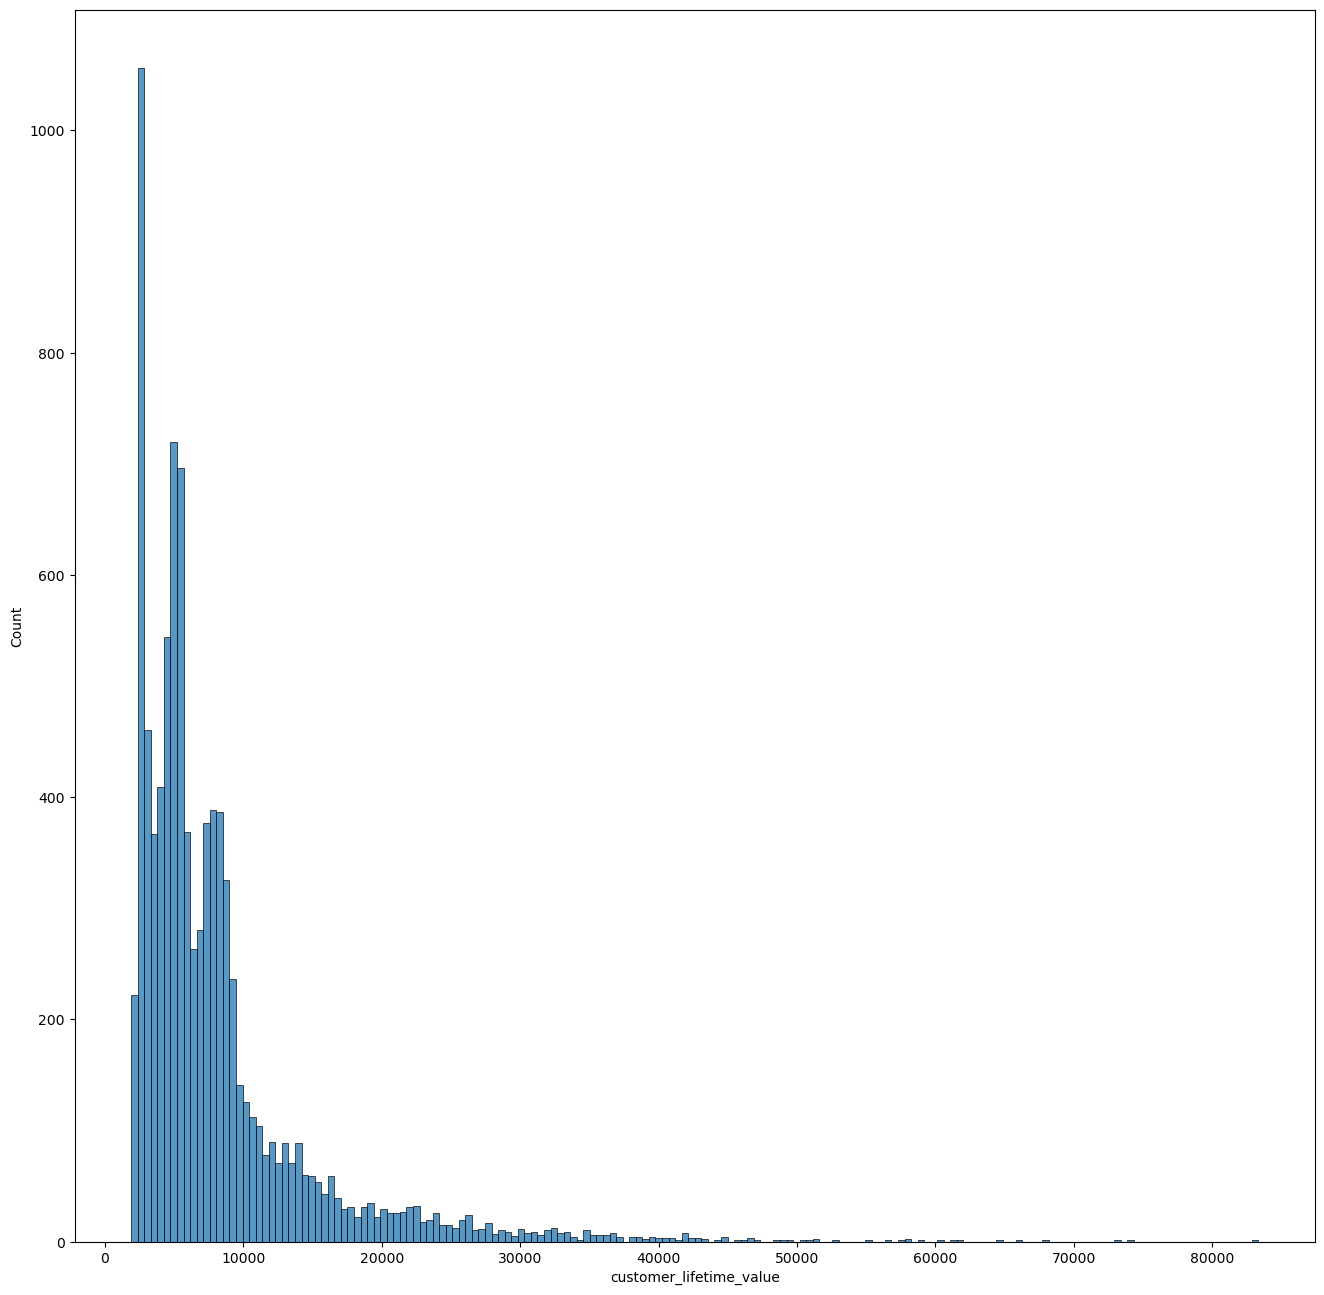

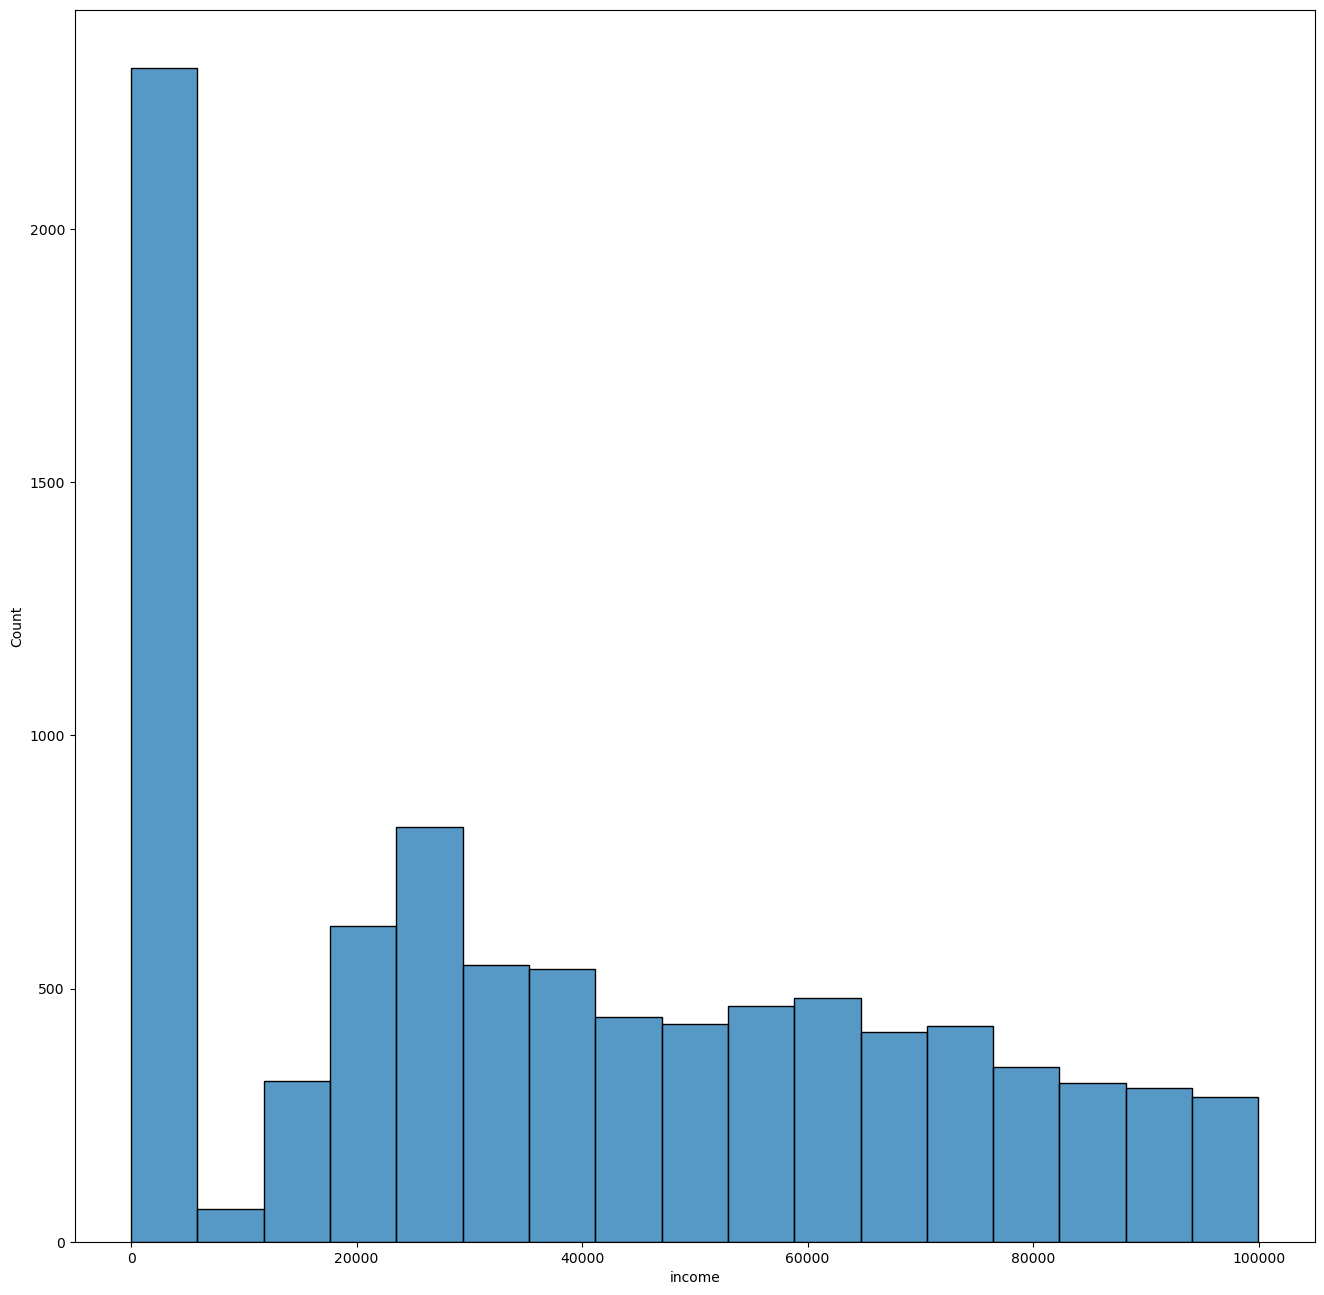

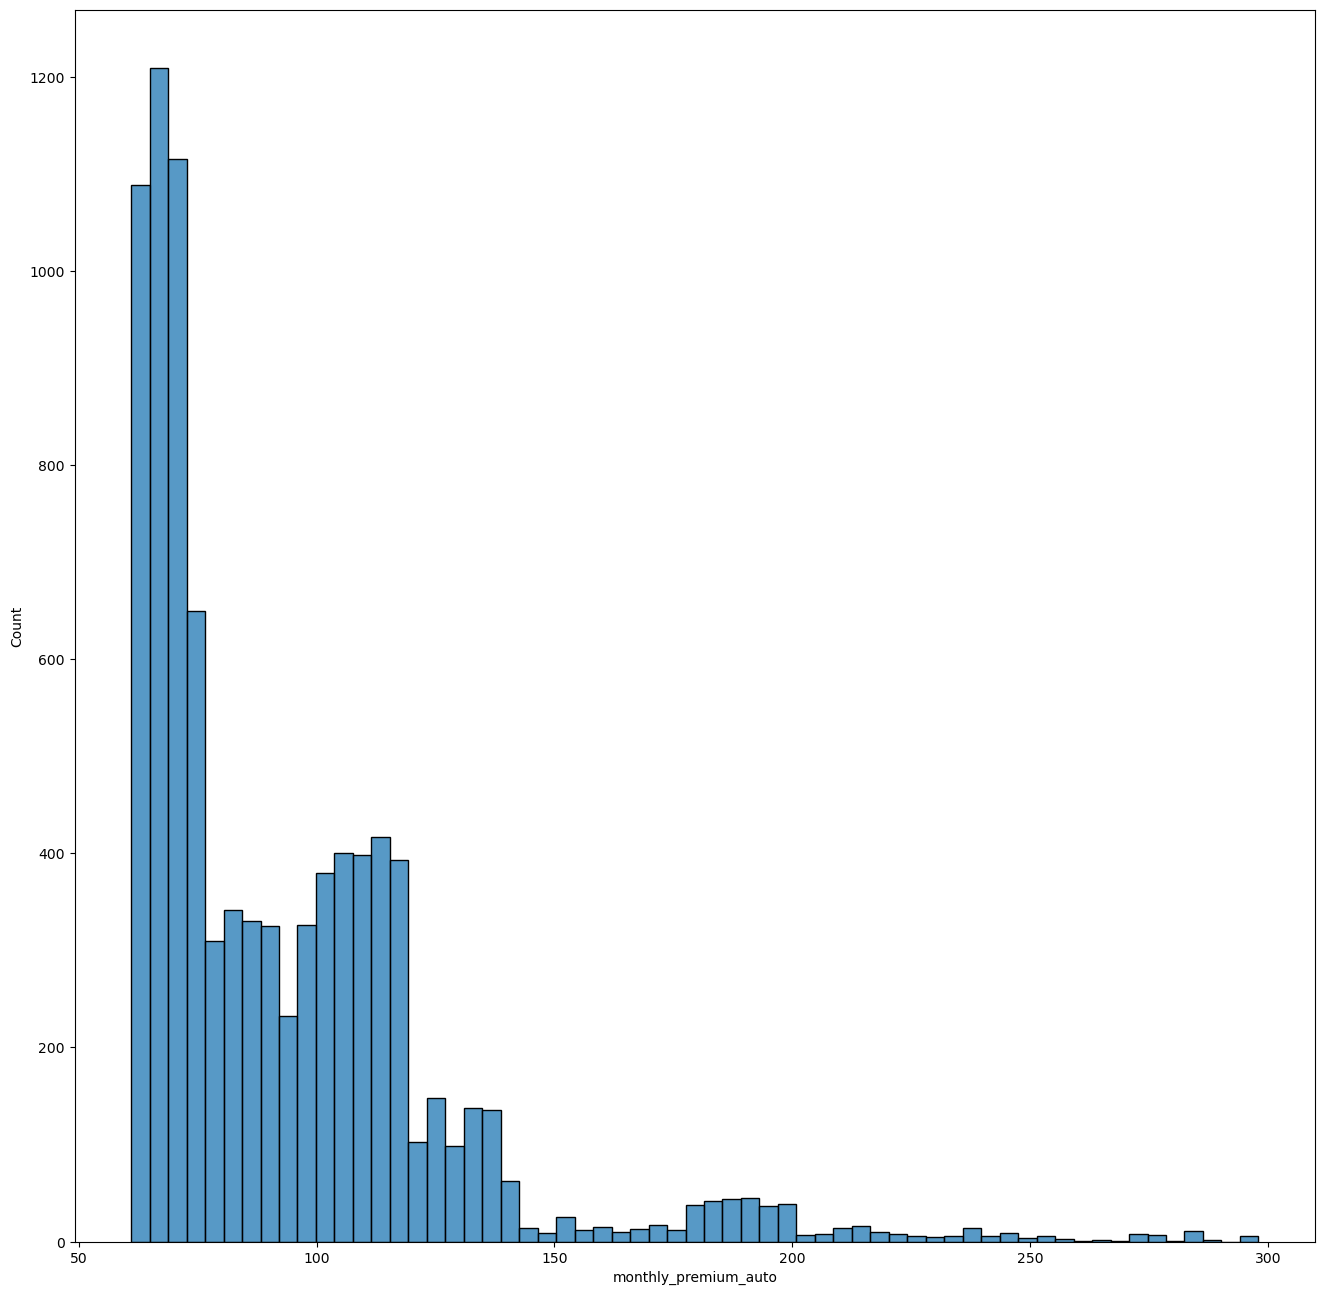

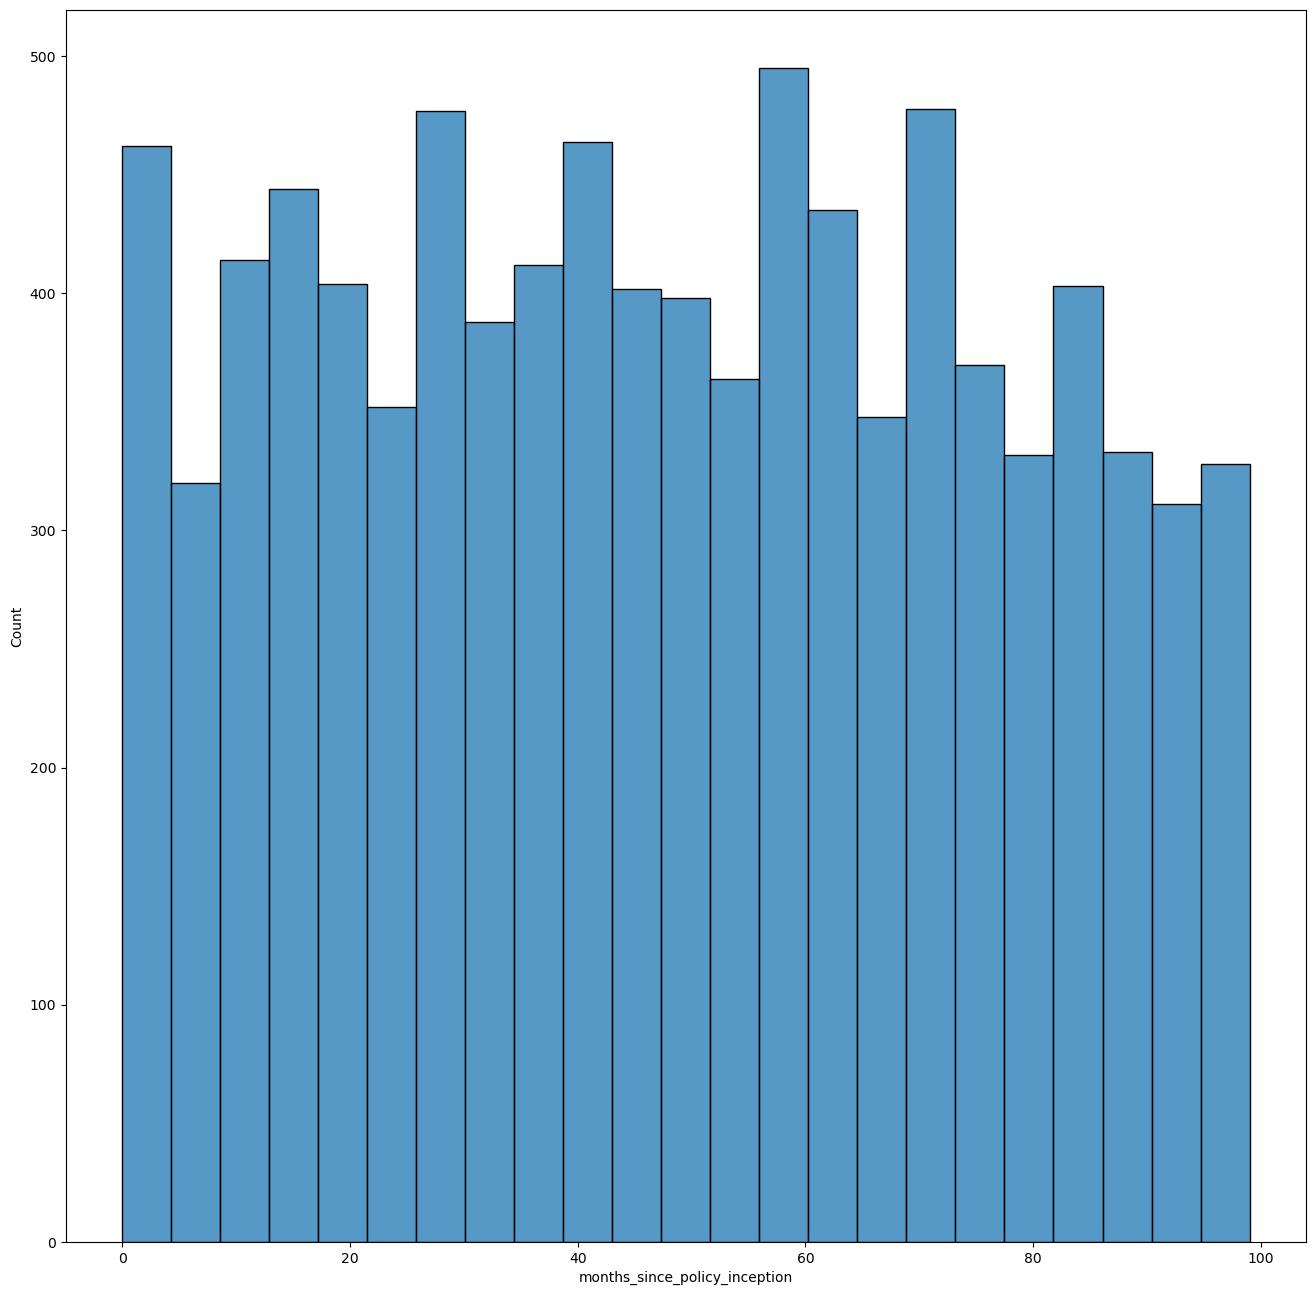

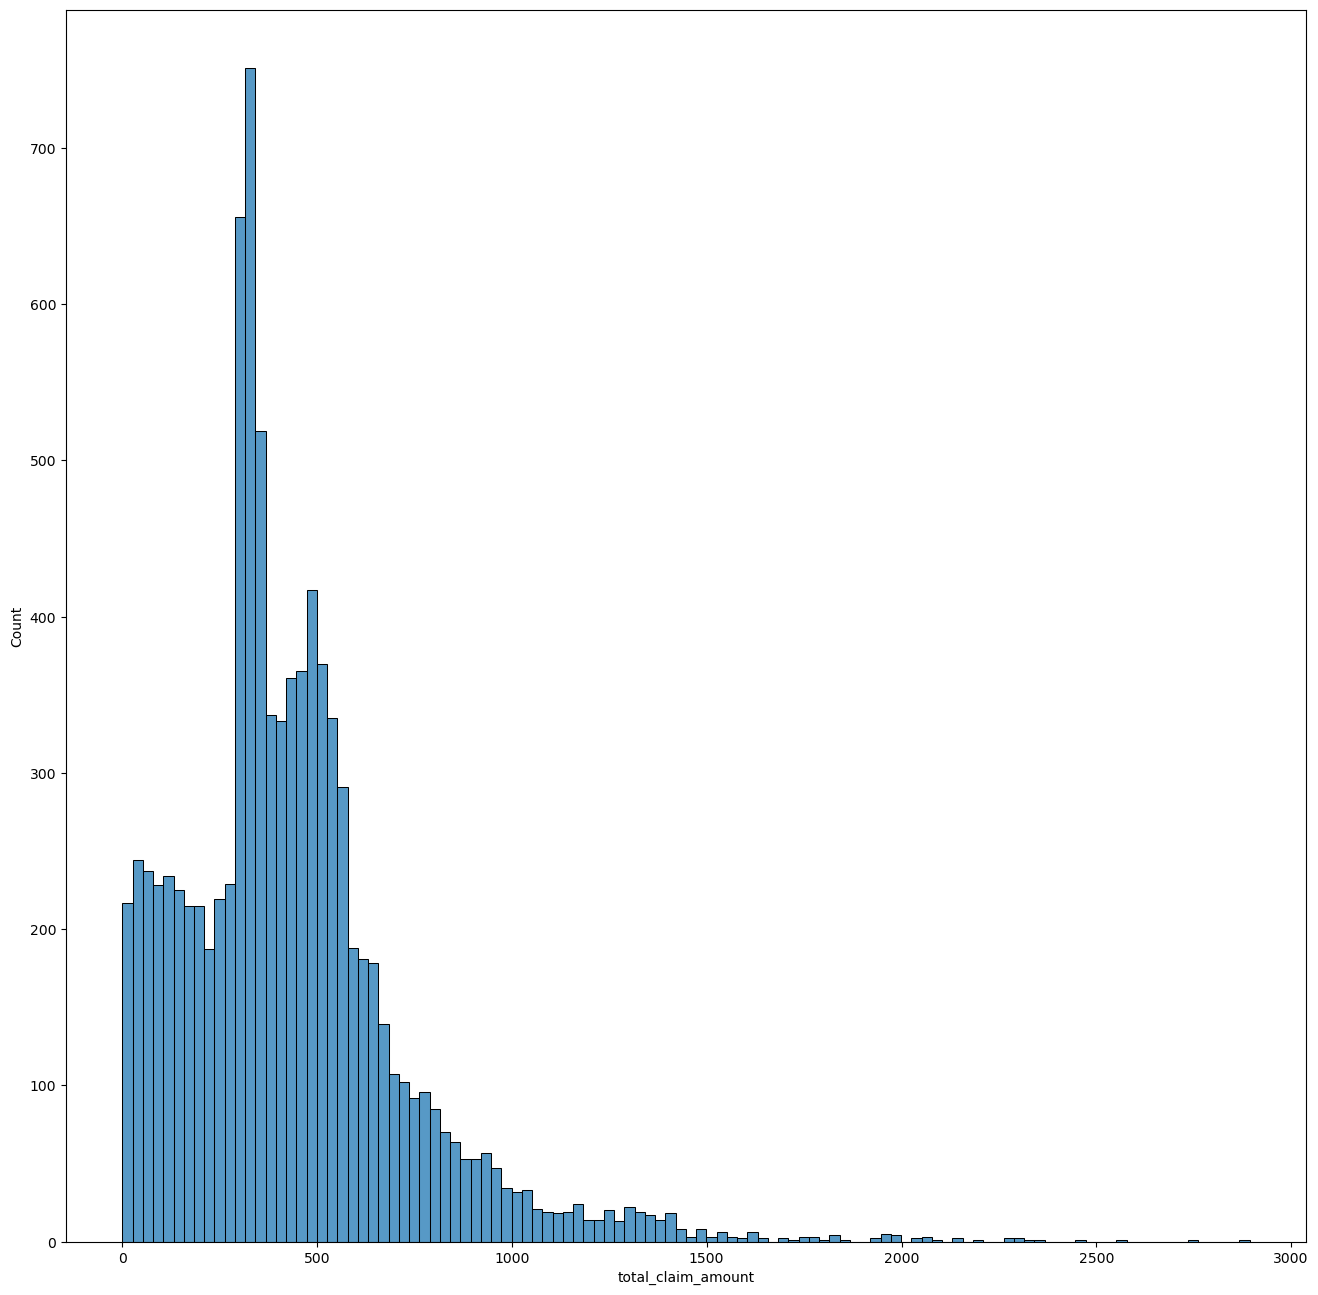

In [19]:
hist_plots_continous(numerical_continous)

In [20]:
# 13
    #R: Yes is needed to apply transformation for the columns since we have
        # skewed data distribution data and the column values aren't in the same range

In [21]:
14#

def outliers_continous_boxplot(x):
    for y in x.columns:
        fig, ax = plt.subplots (figsize = (16,16))
        sns.boxplot(x = y, data =x )
    return plt.show()

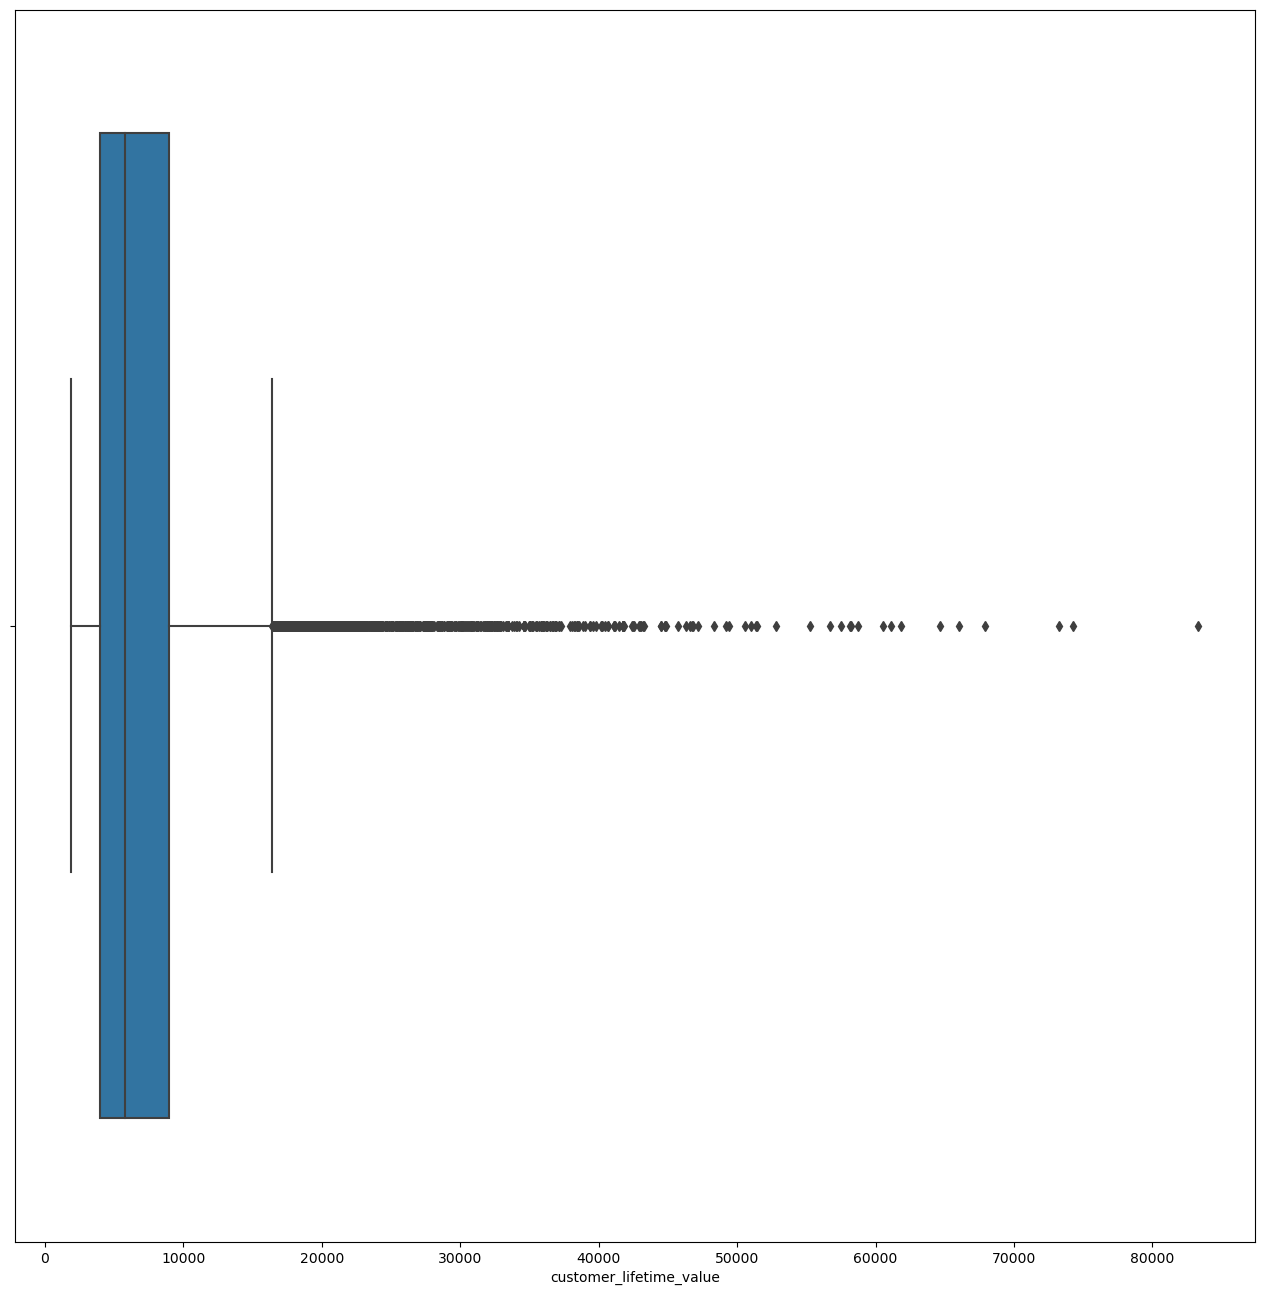

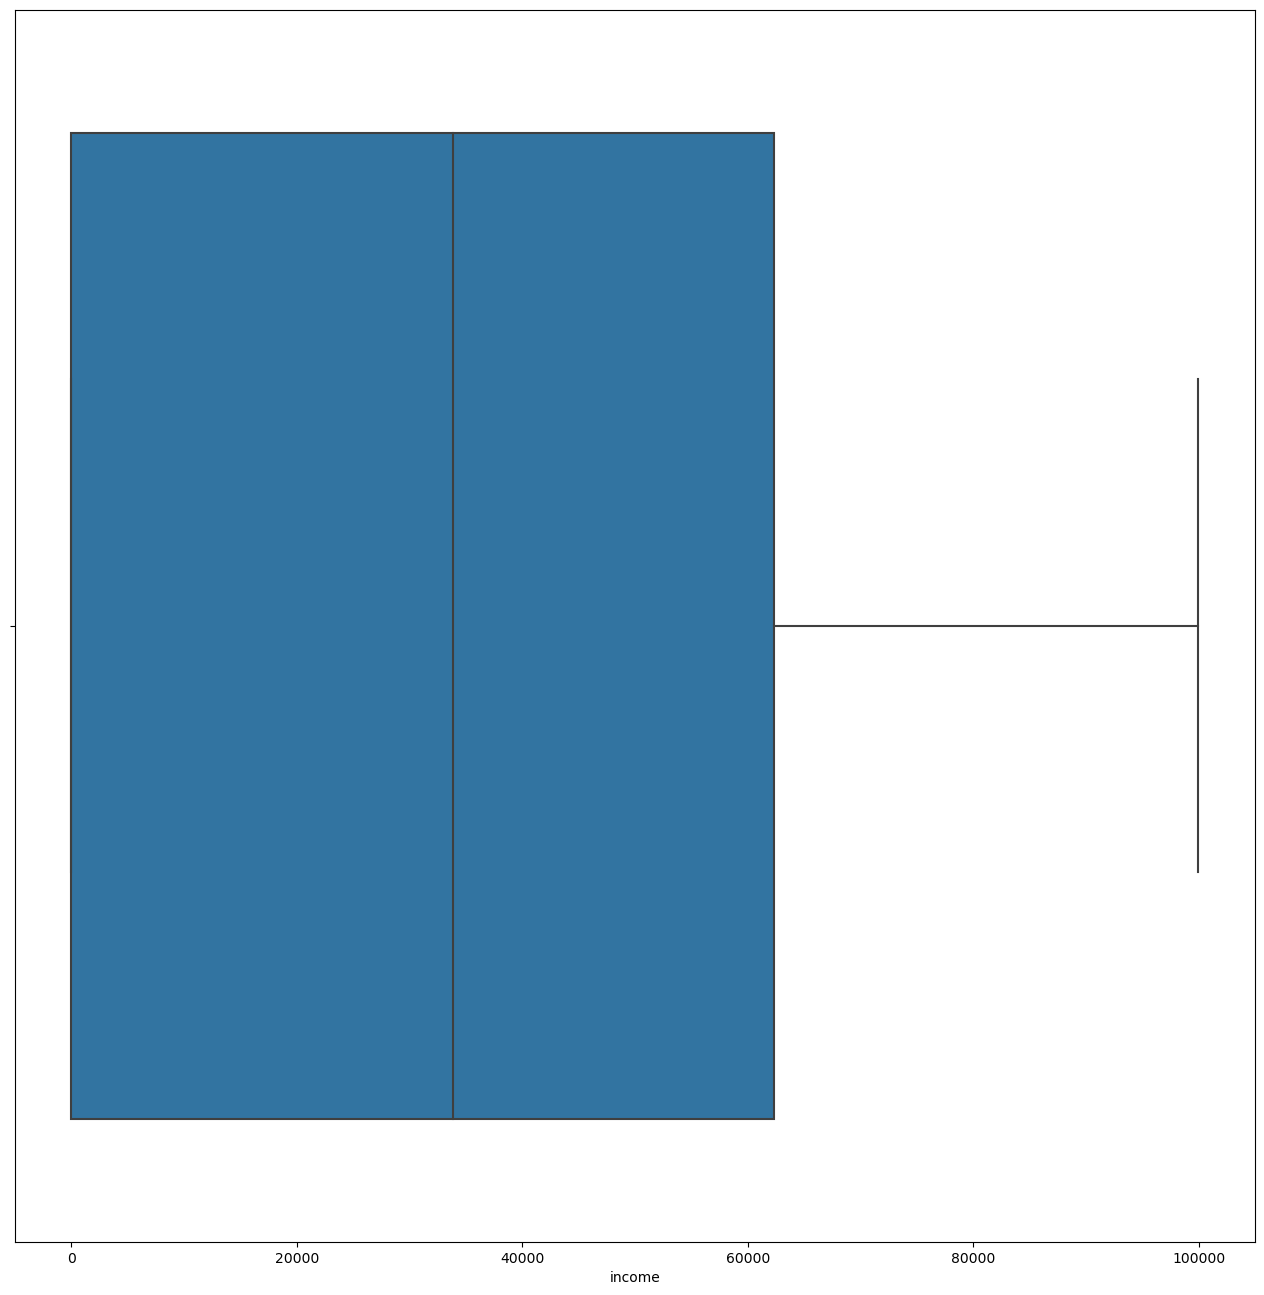

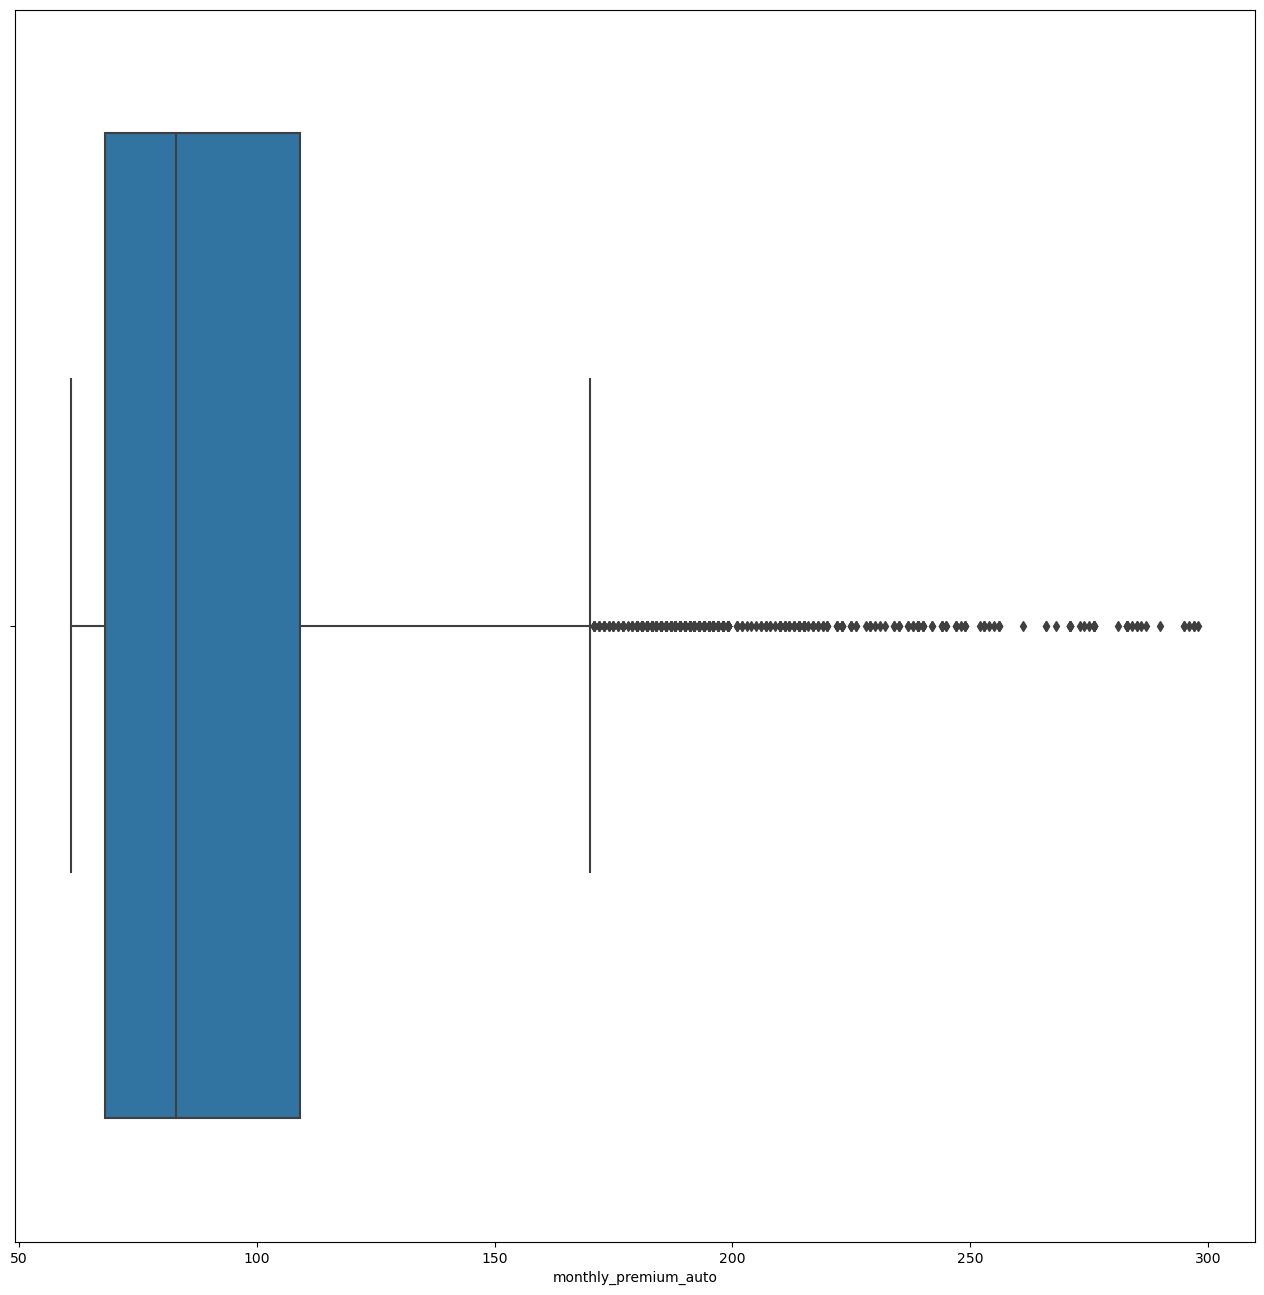

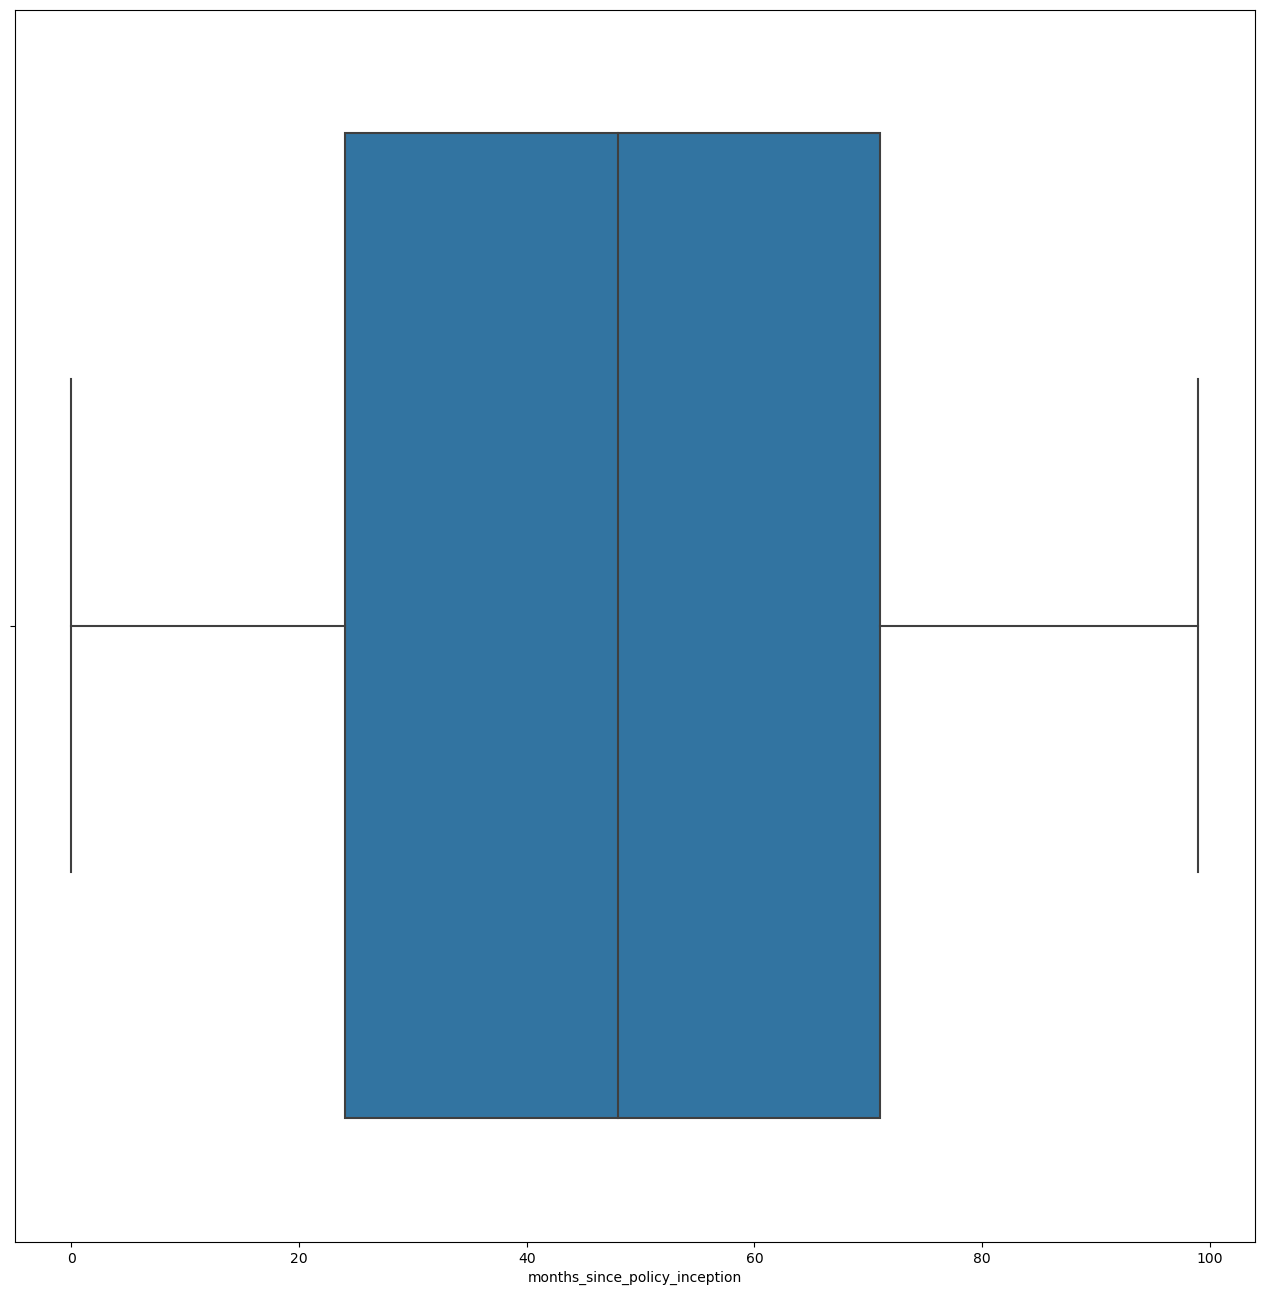

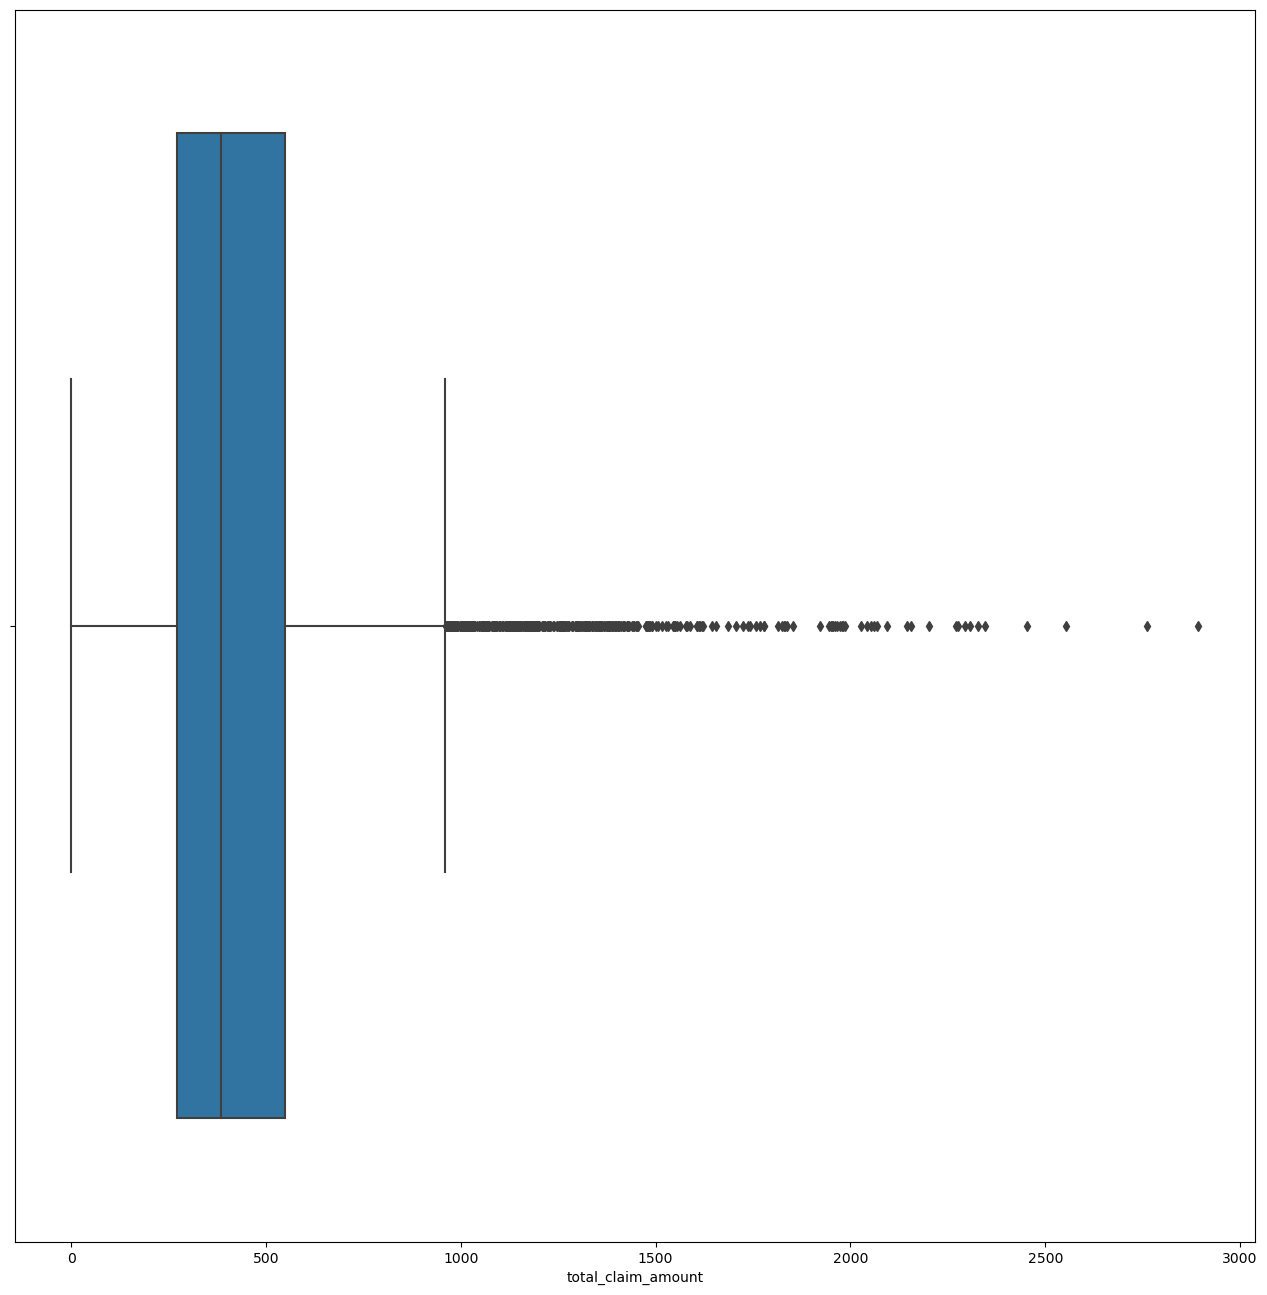

In [22]:
outliers_continous_boxplot(numerical_continous)

# Lab Cleaning Categorical Data

In [23]:
#1

def countplot_categoricals(x):
    df_nunique = x.nunique().reset_index()
    df_nunique.columns = ['column','nunique'] 
    nunique_great6 = list(df_nunique[df_nunique['nunique']>=6]['column'].unique())
    for i in nunique_great6:
        fig, ax = plt.subplots (figsize = (16,16))
        sns.countplot(y = i, data =x, order = categorical_df[i].value_counts().index )
    df_nunique = x.nunique().reset_index()
    df_nunique.columns = ['column','nunique']
    nunique_low6 = list(df_nunique[df_nunique['nunique']<6]['column'].unique())
    for j in nunique_low6:
        fig, ax = plt.subplots (figsize = (16,16))
        sns.countplot(x = j, data =x, order = categorical_df[j].value_counts().index )
    return plt.show()

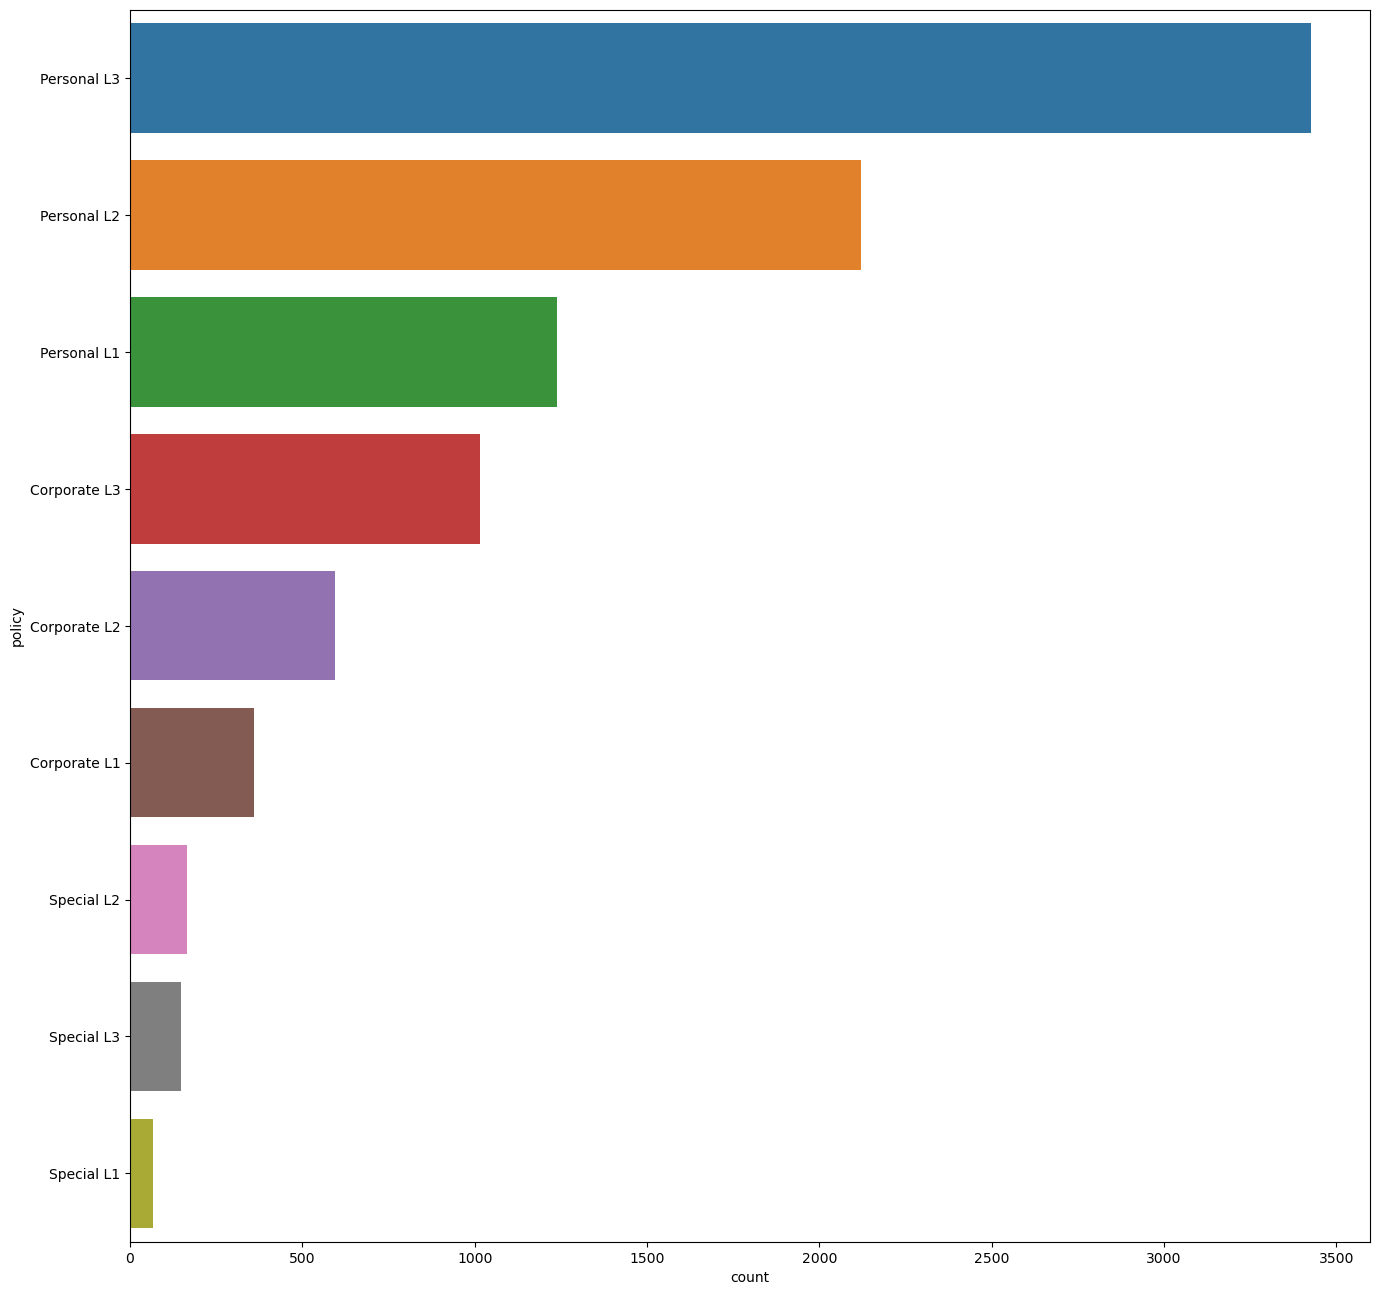

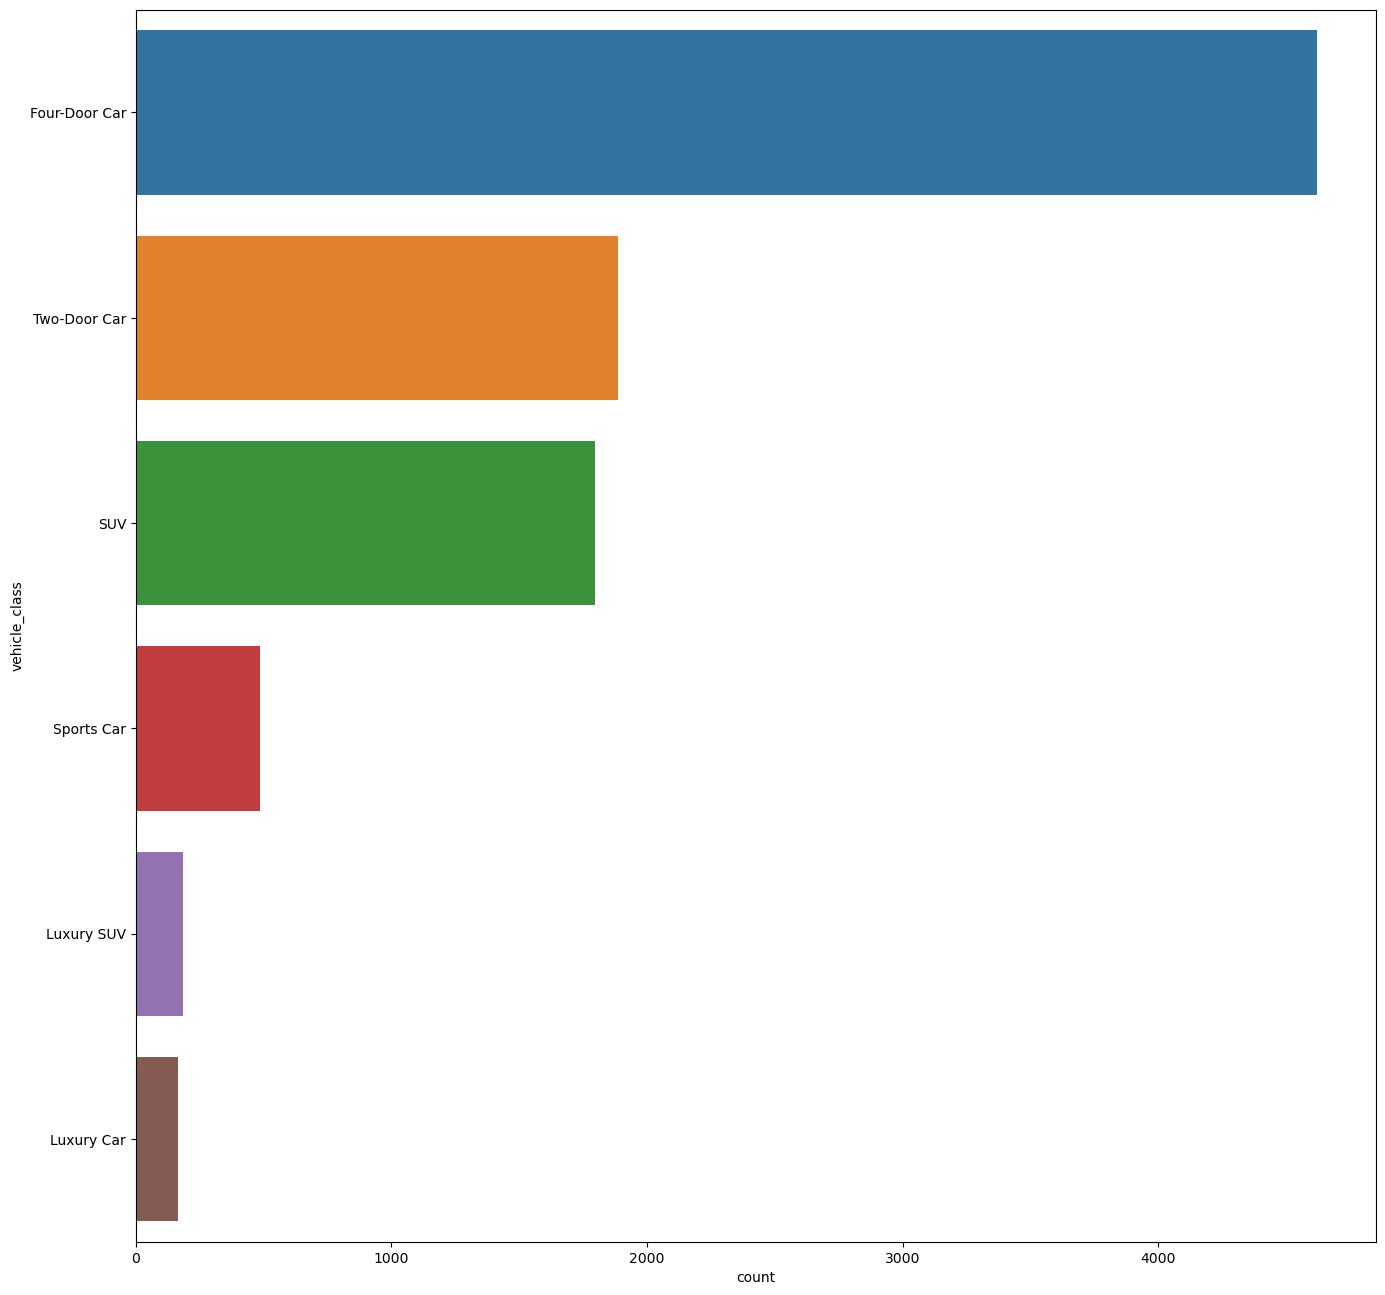

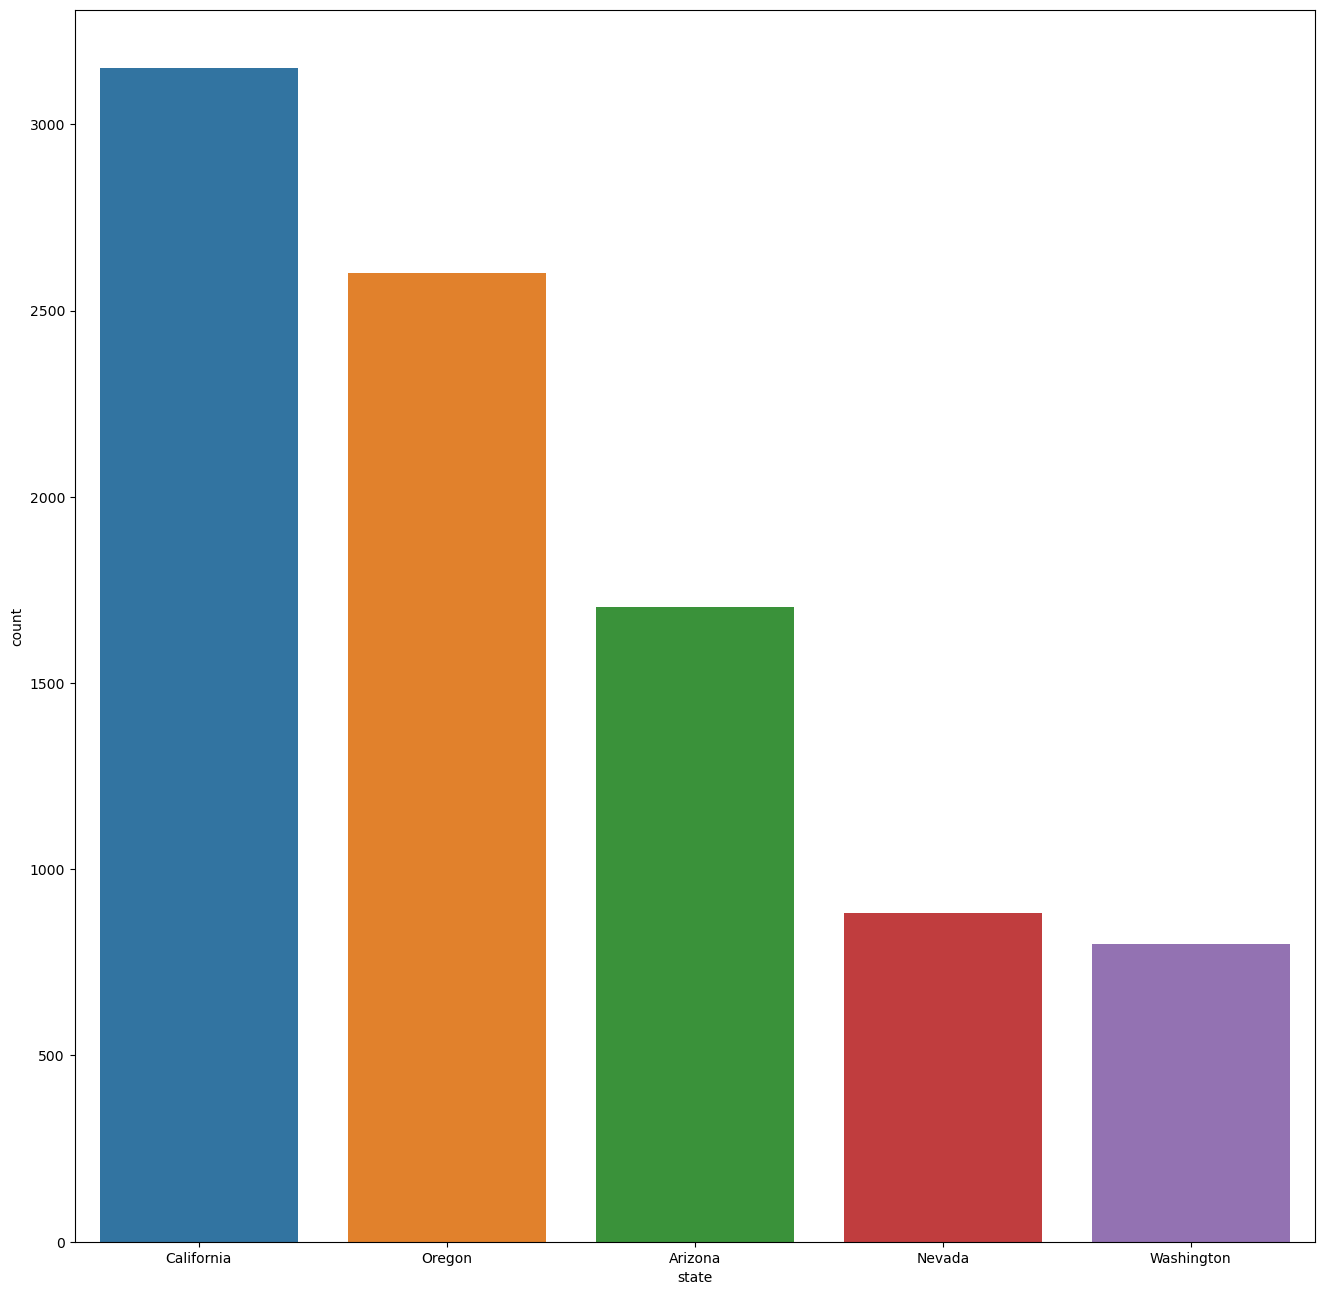

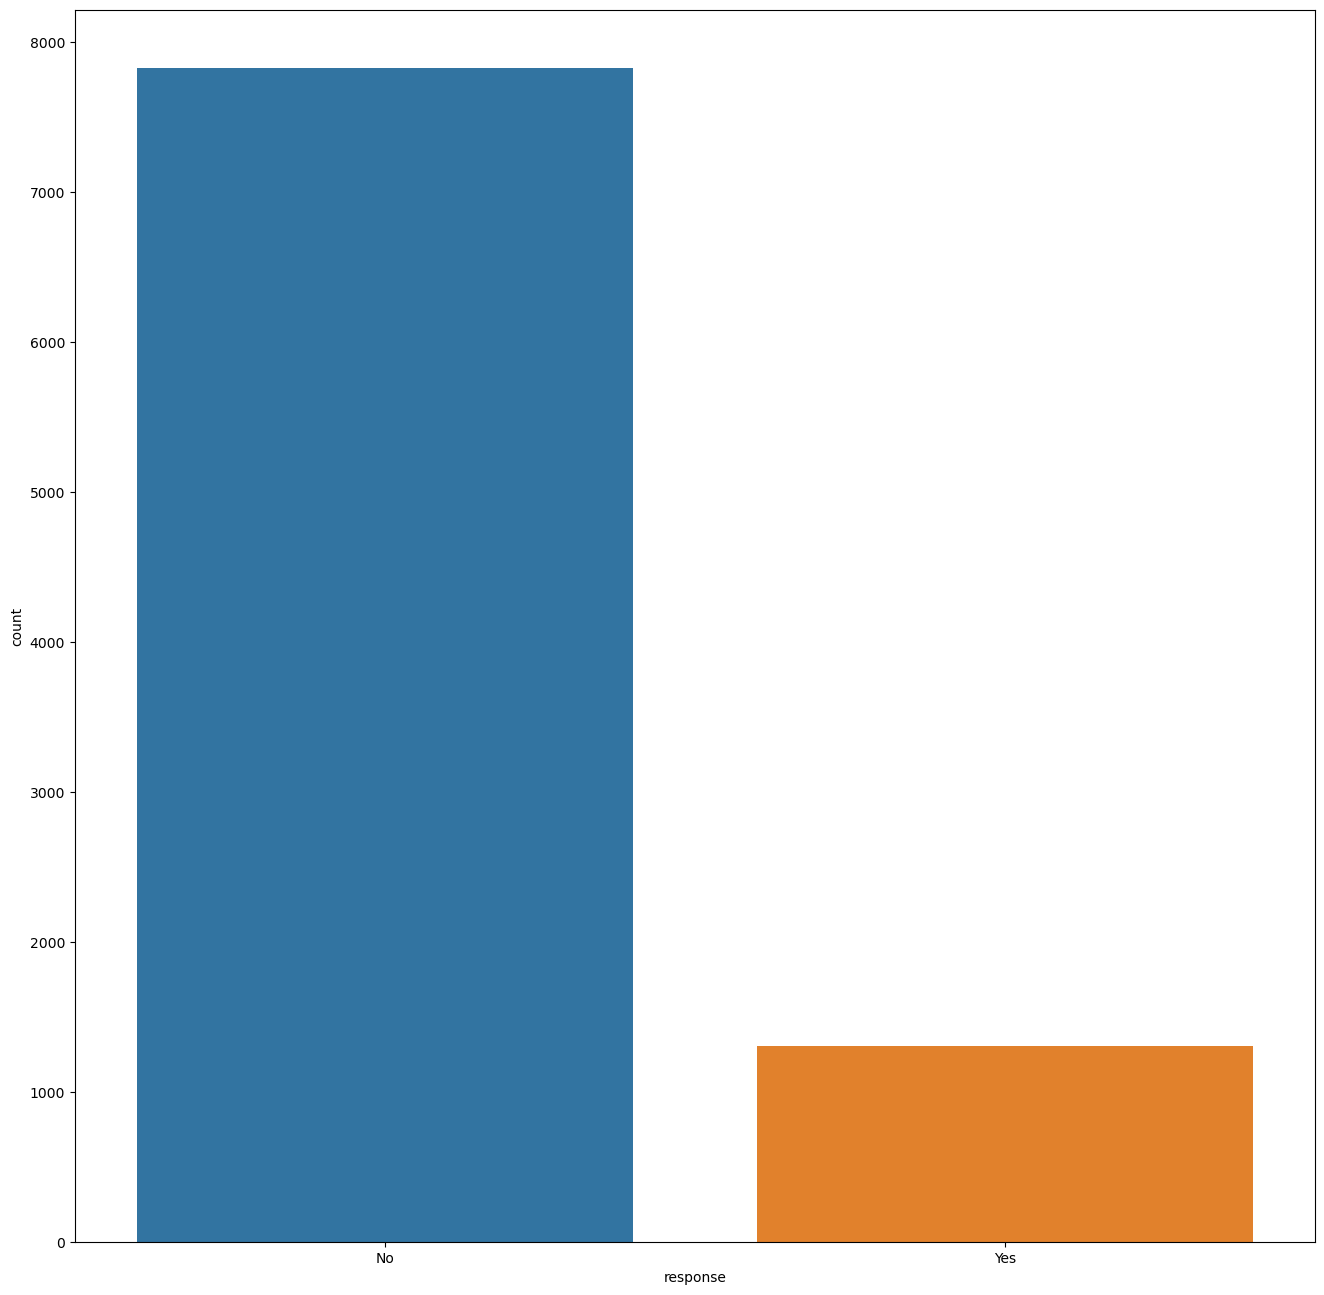

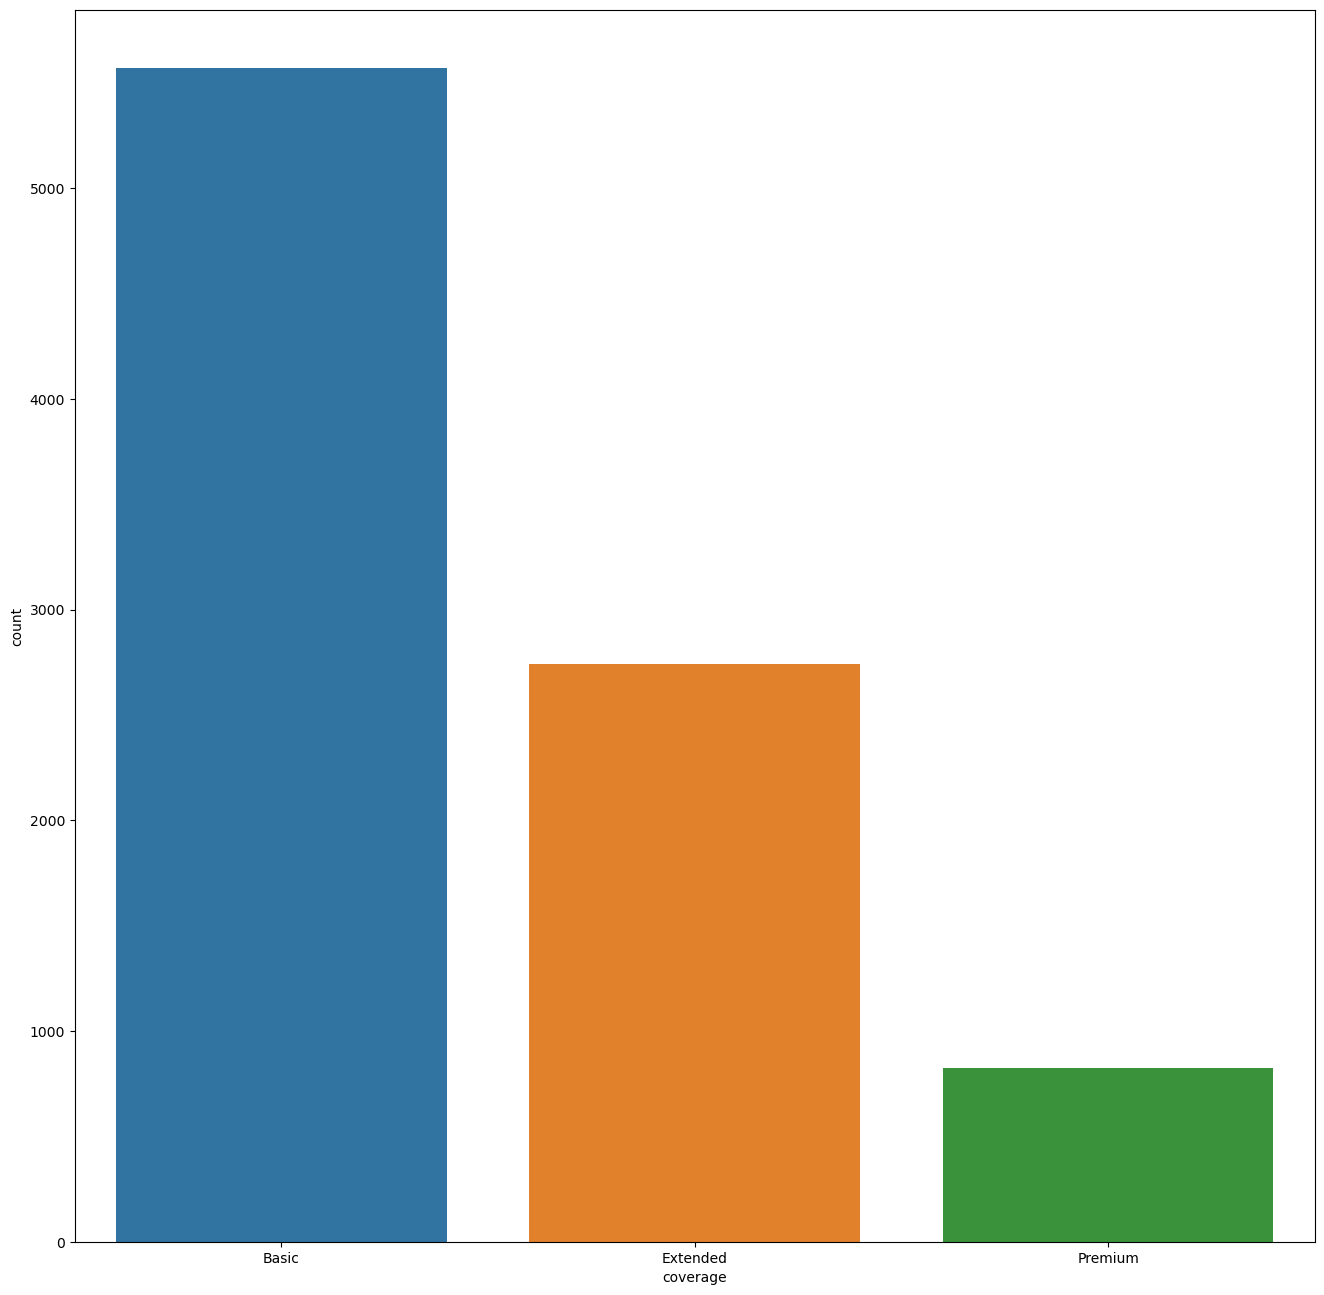

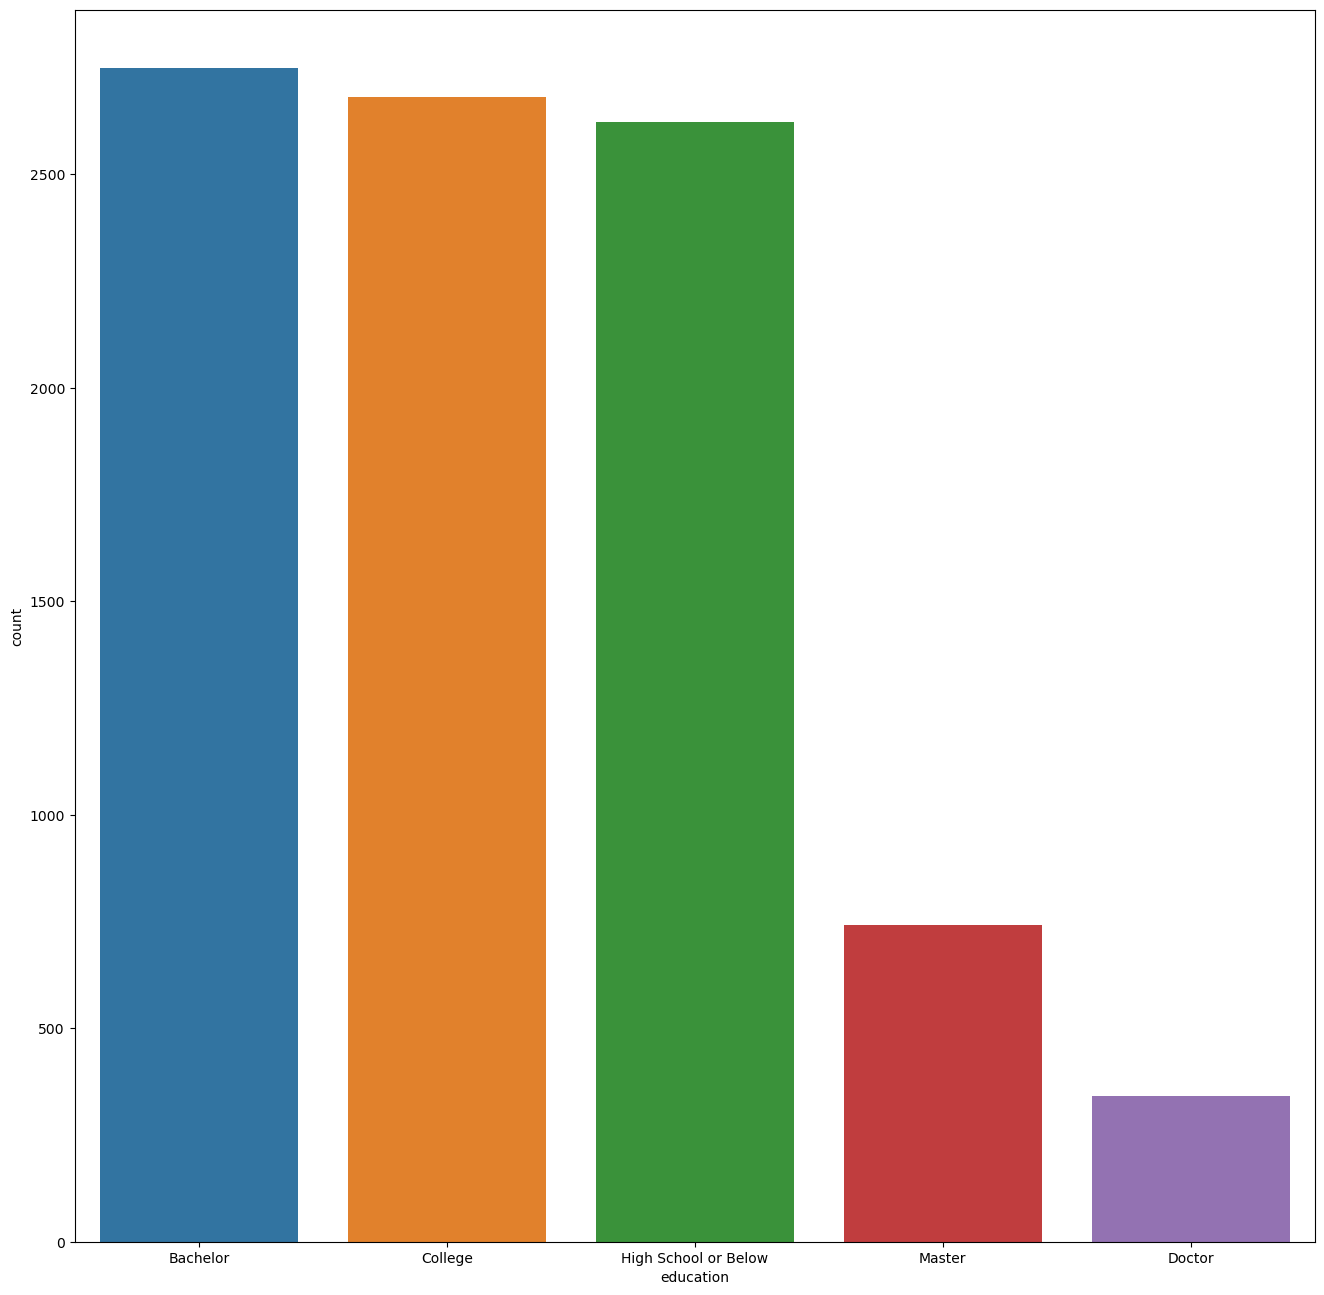

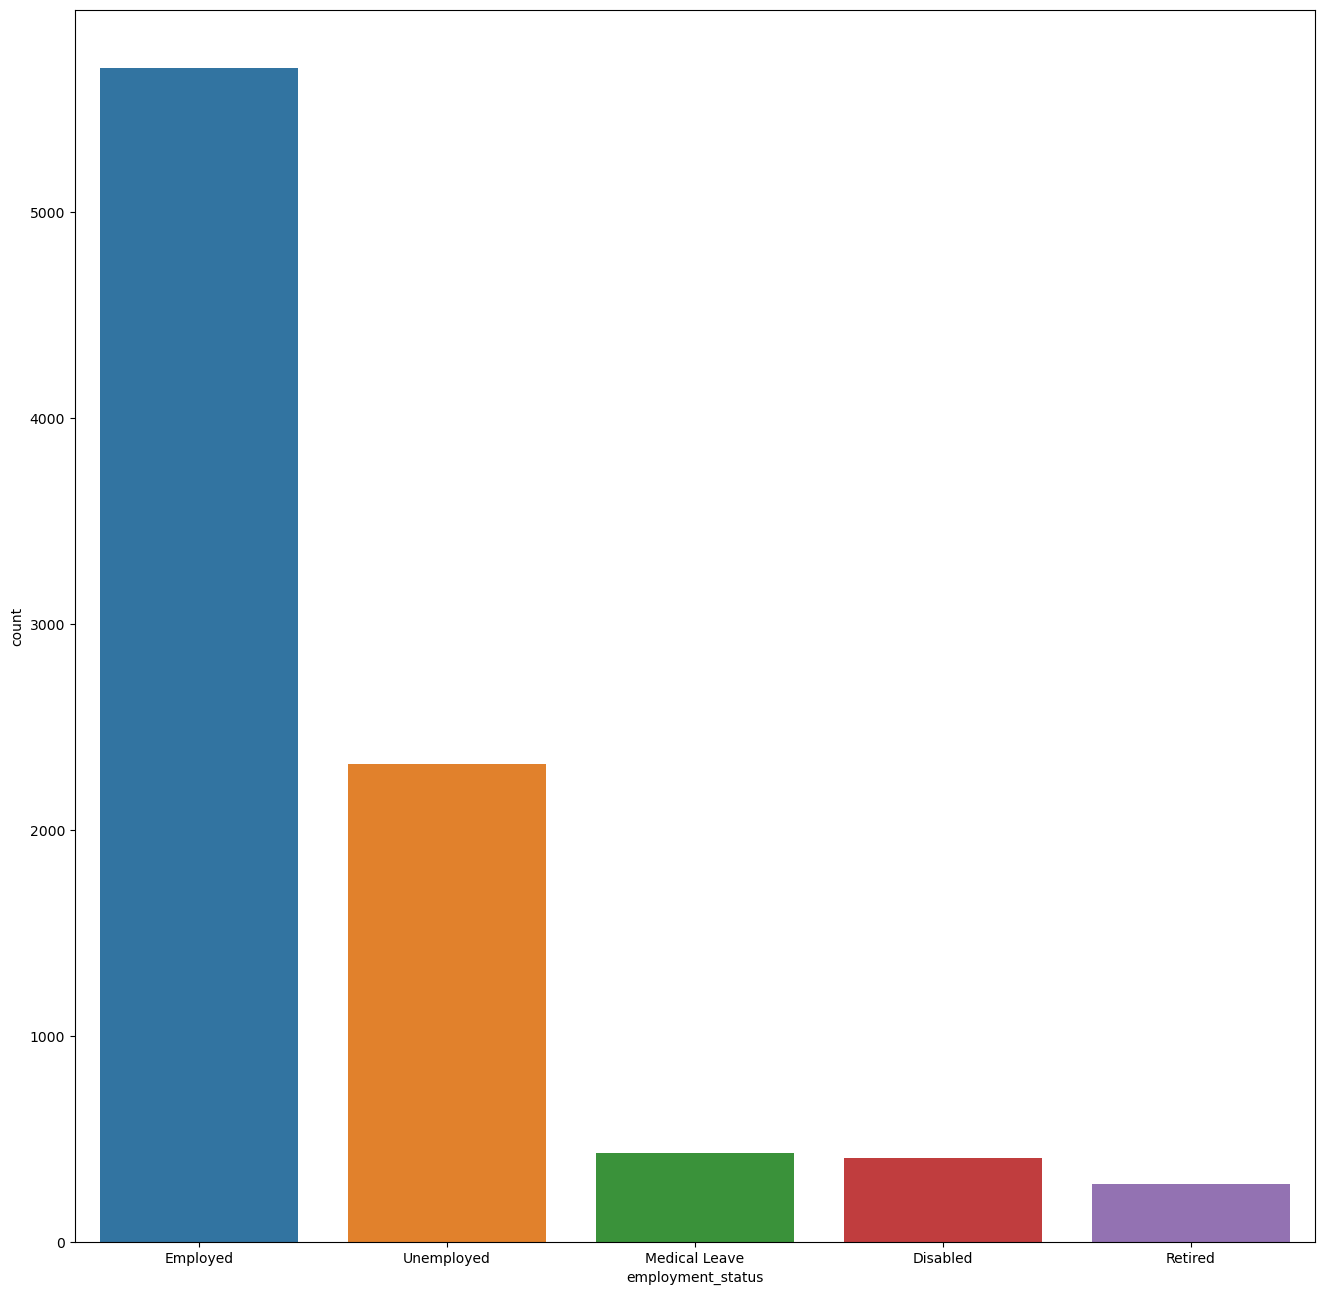

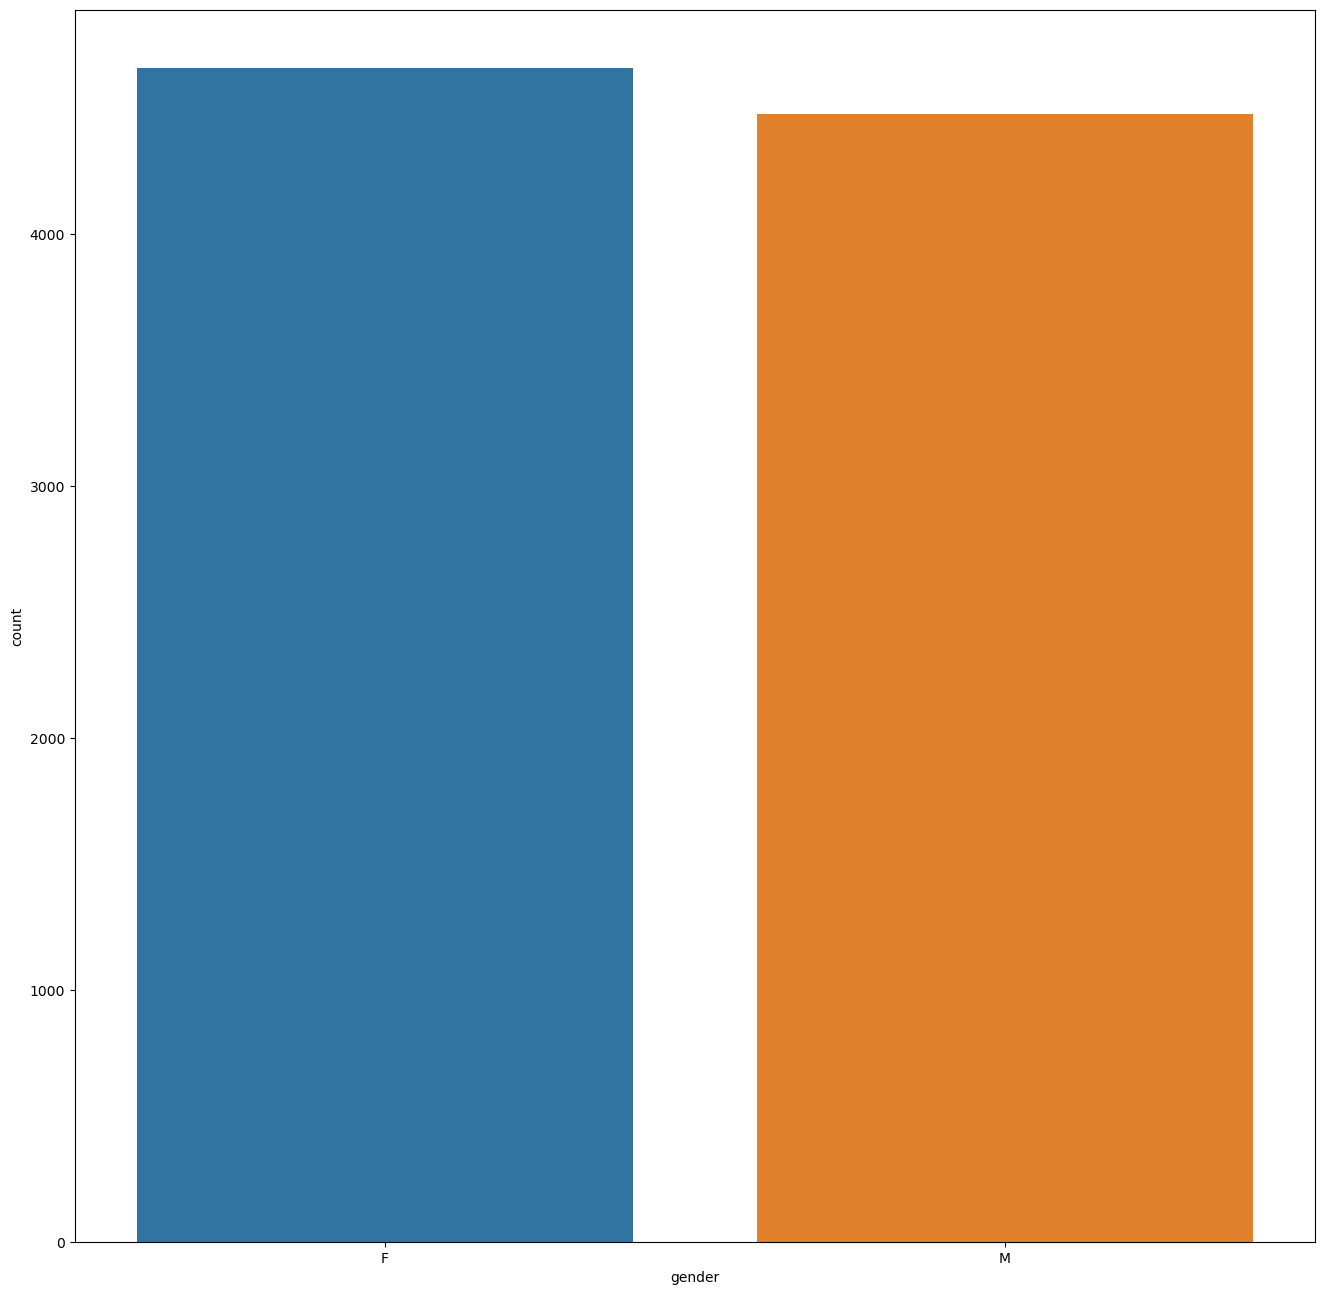

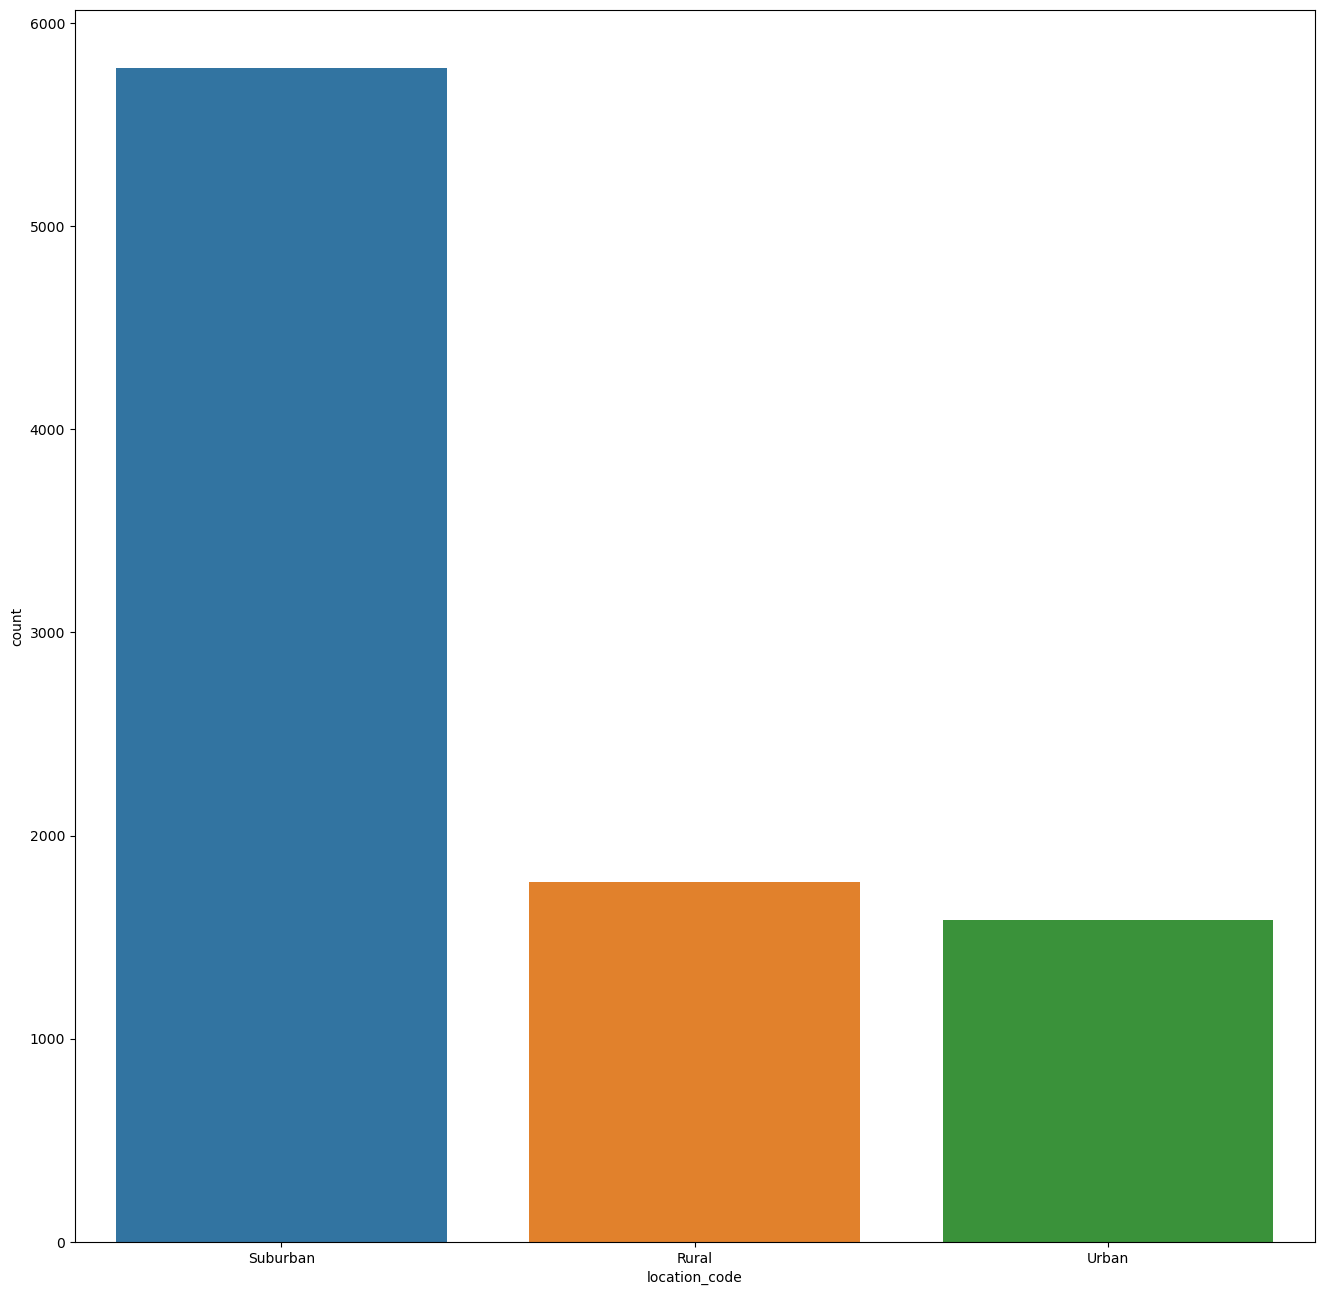

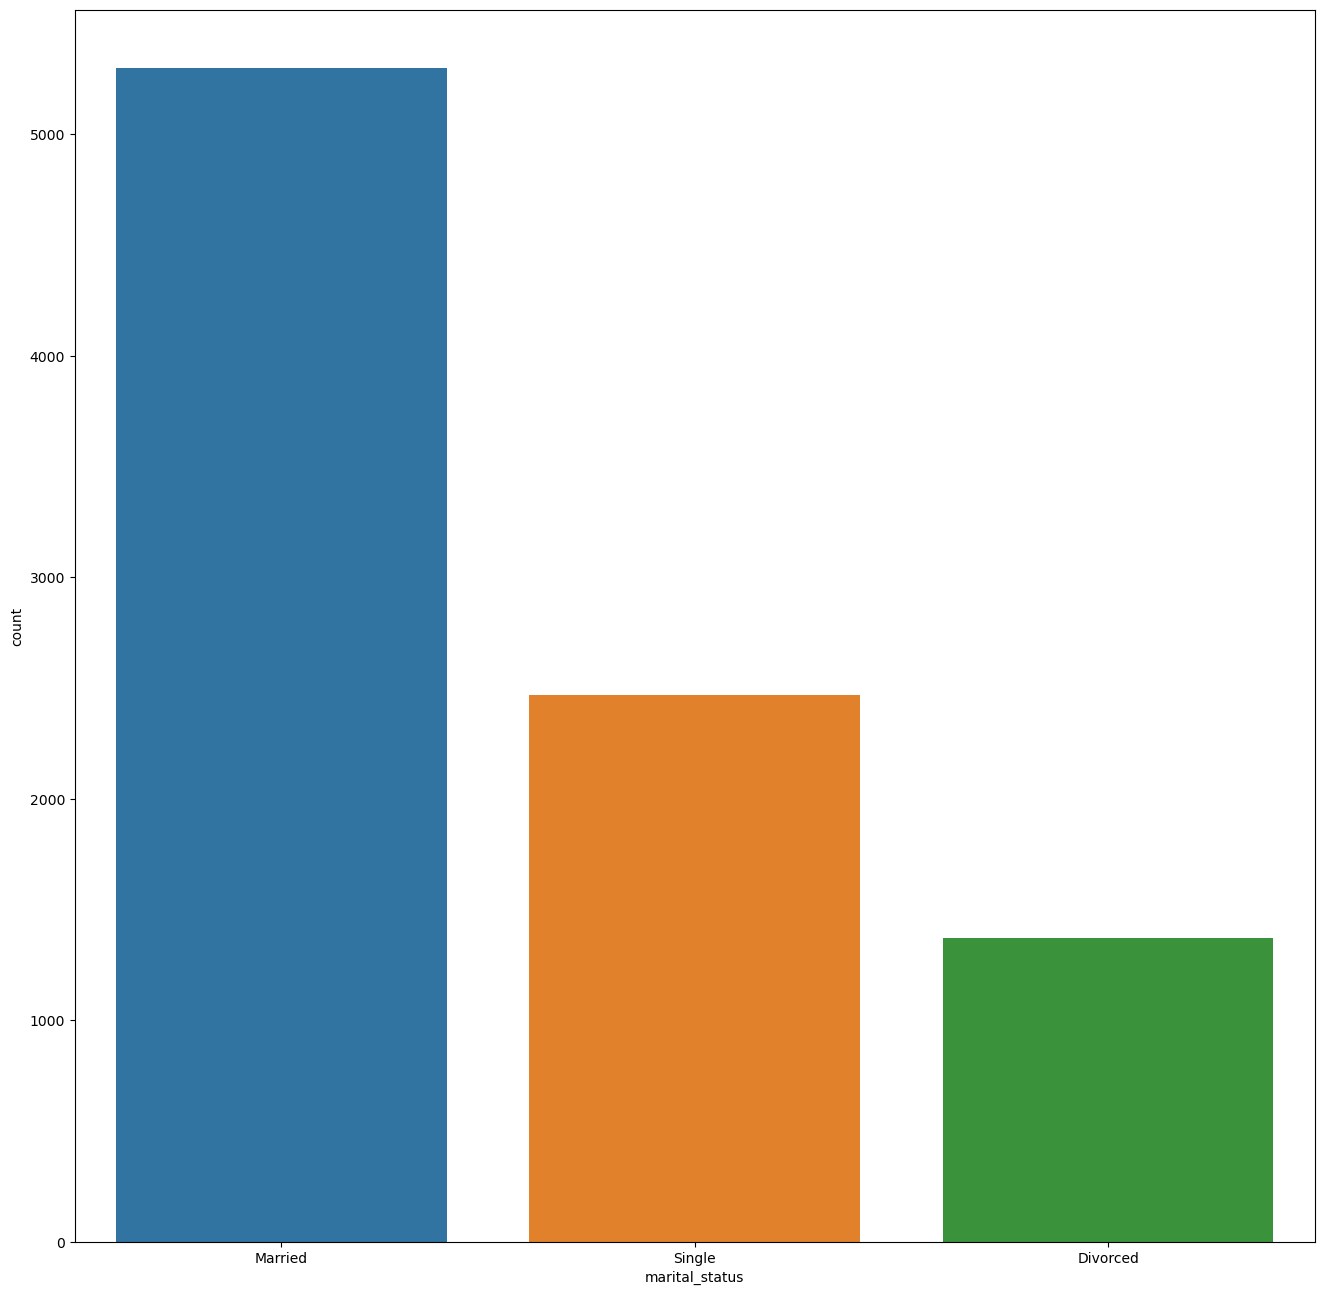

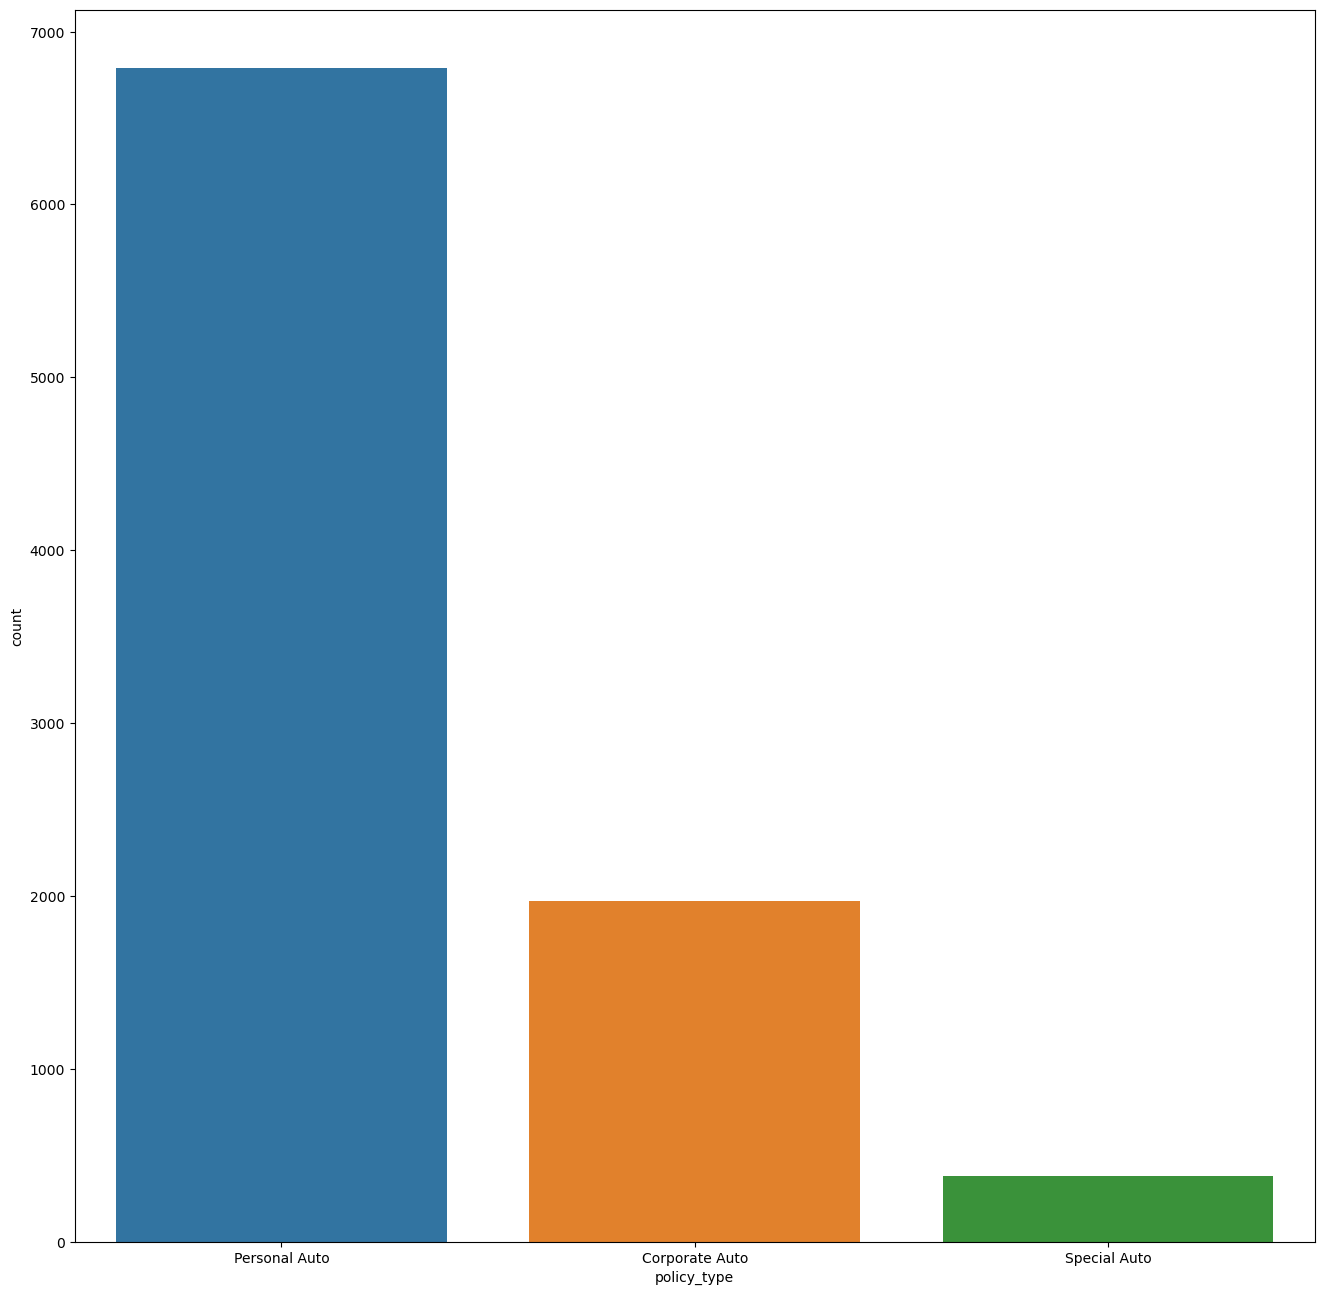

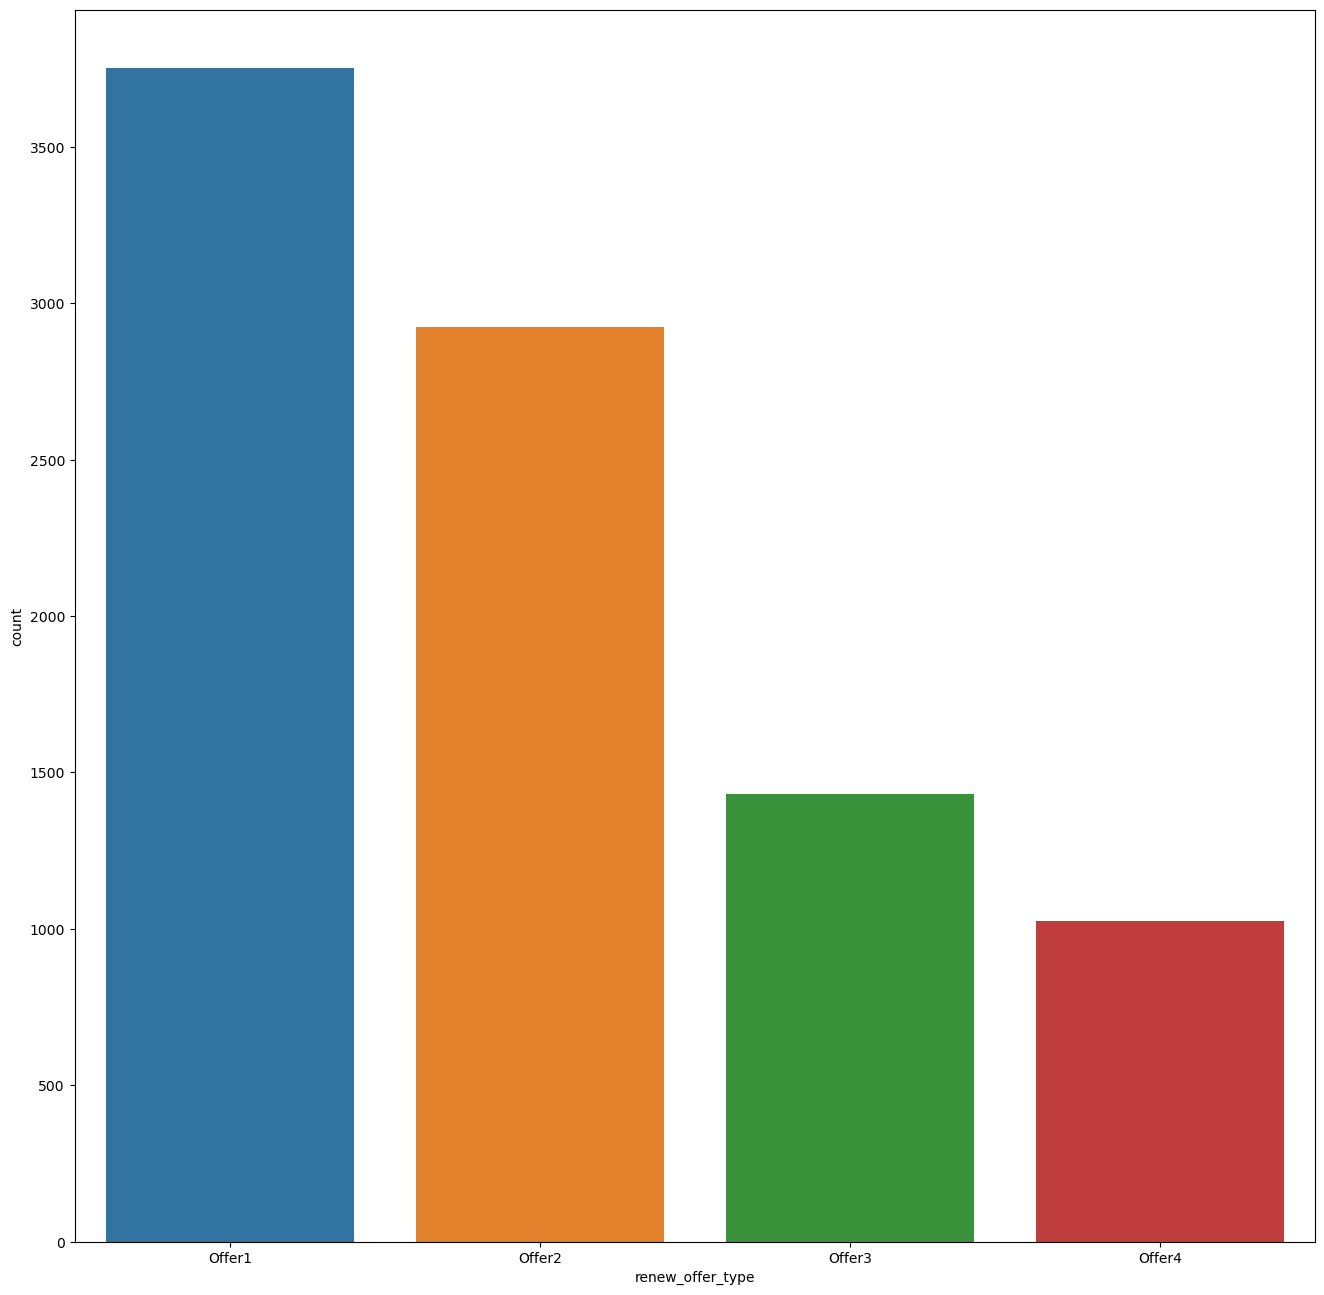

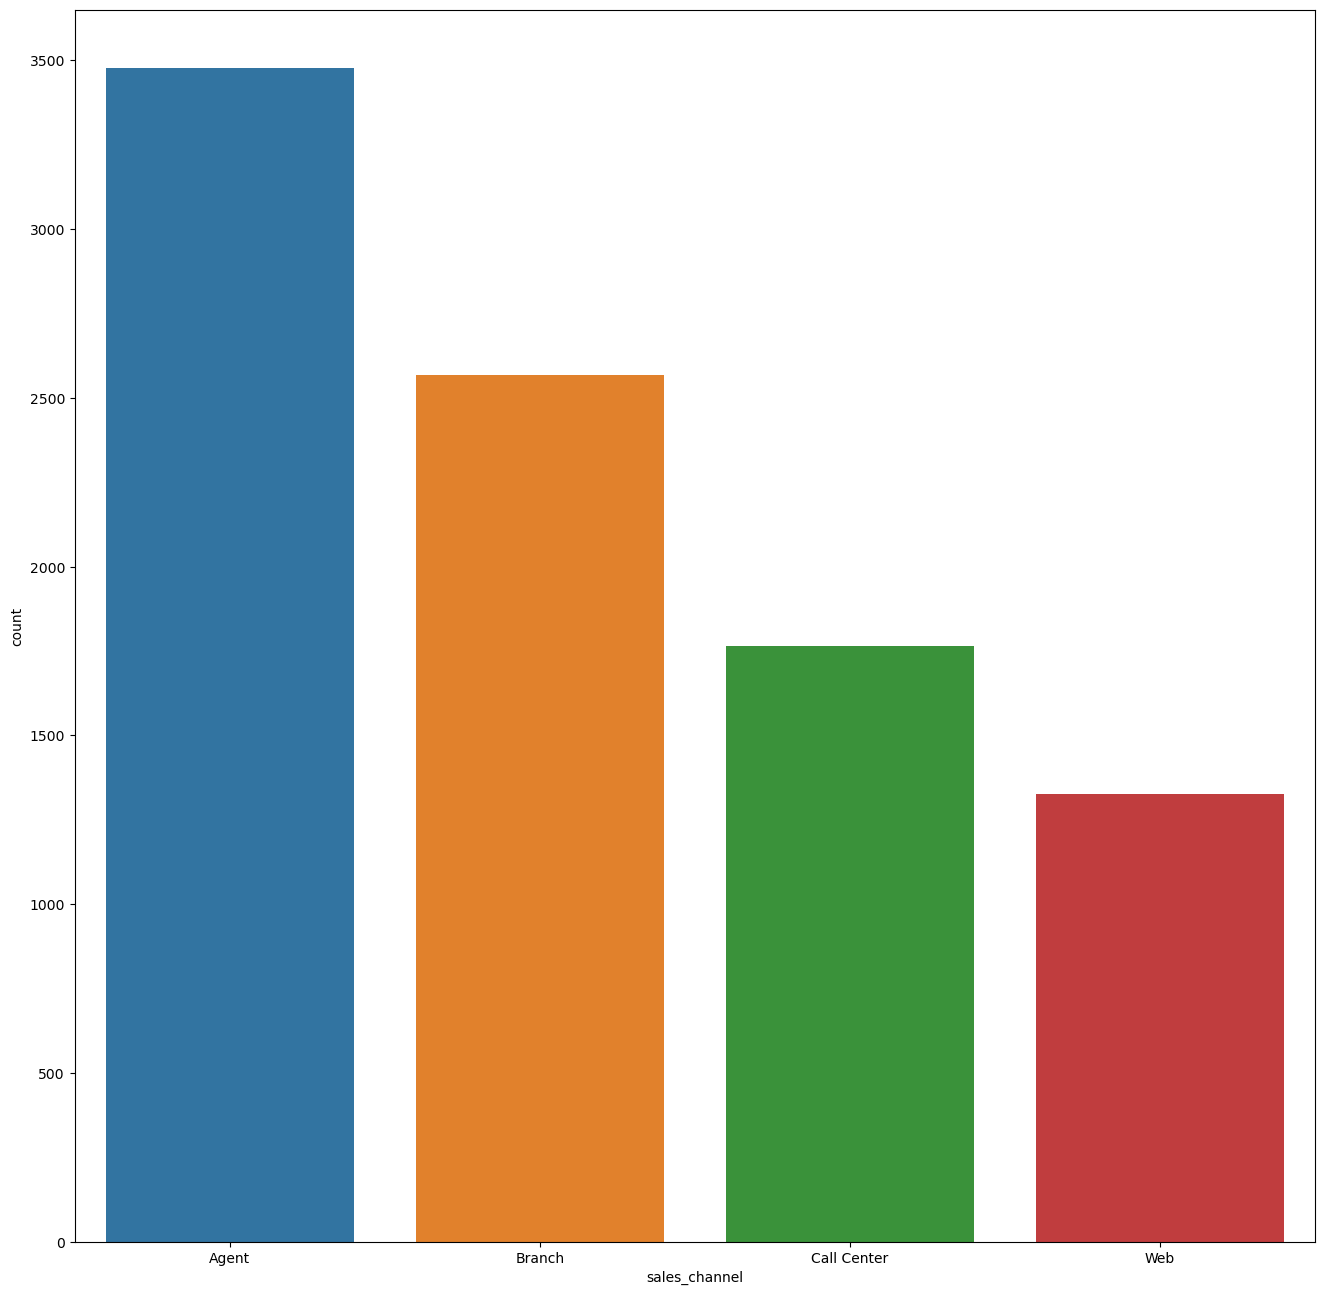

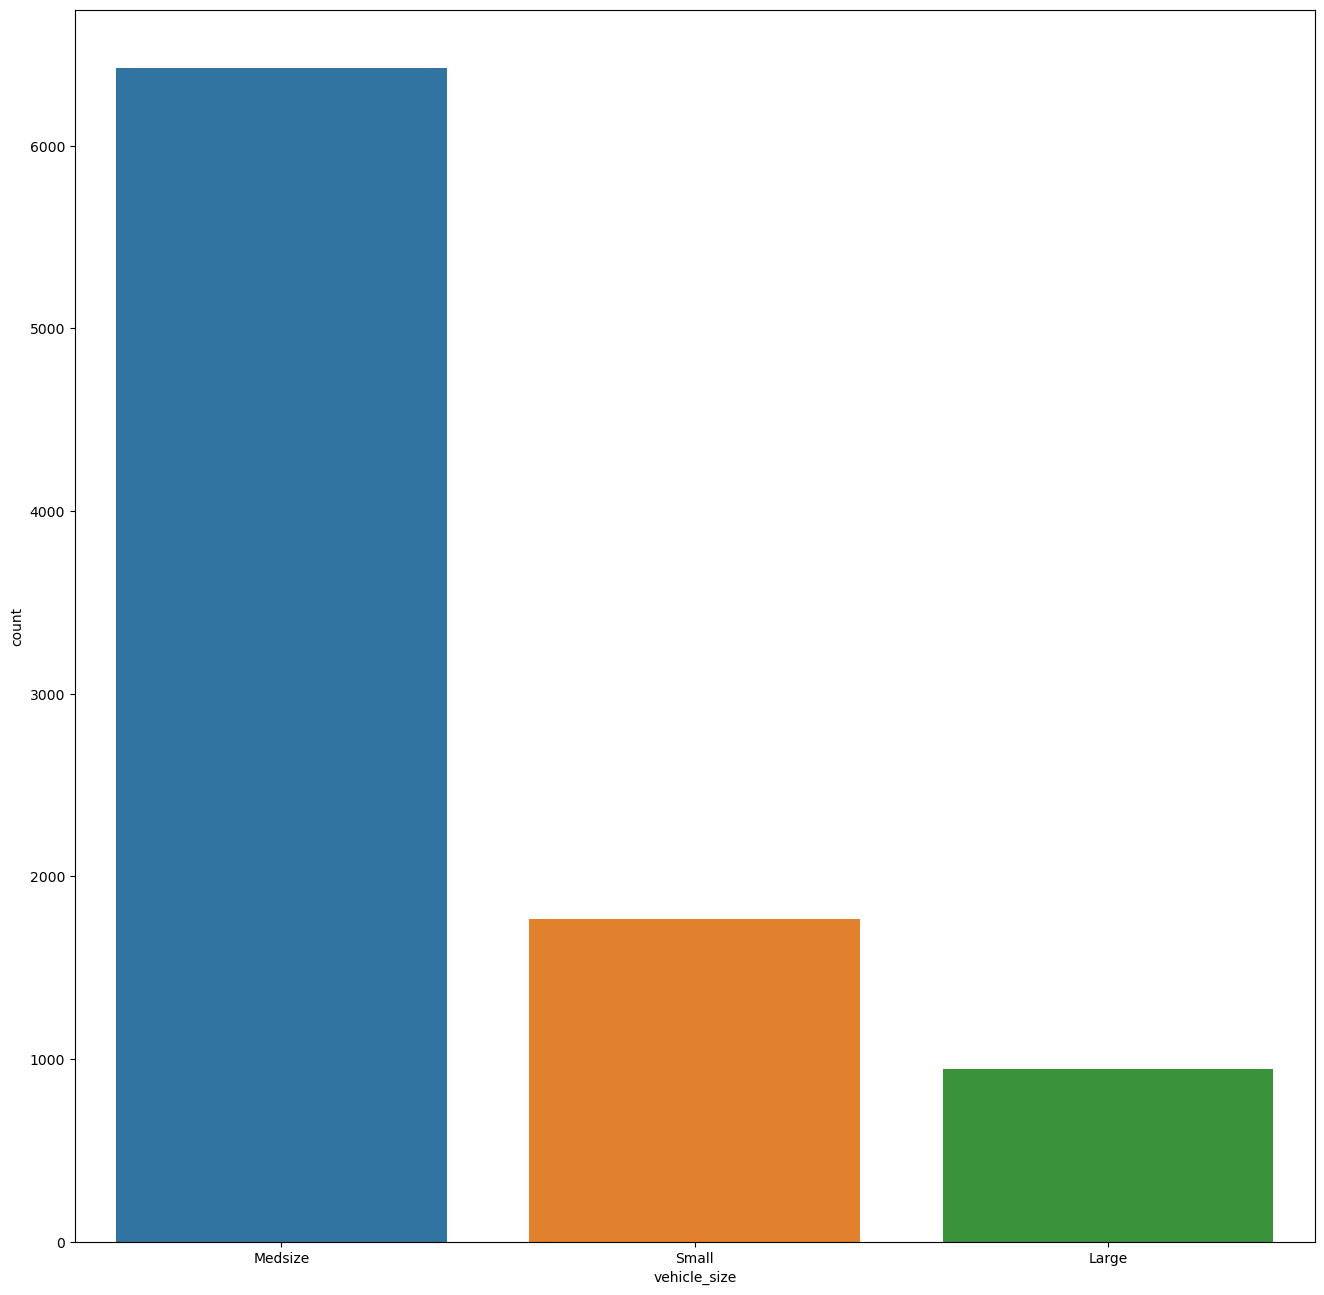

In [24]:
countplot_categoricals(categorical_df)

In [25]:
#2

categorical_df = categorical_df.drop(['policy_type'], axis=1)

def clean_policy(x):
    if 'L3' in x:
        return ('L3')
    elif 'L2' in x:
        return ('L2')
    else:
        return('L1')
categorical_df['policy'] = categorical_df['policy'].apply(clean_policy)  

categorical_df['policy'].value_counts()

L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

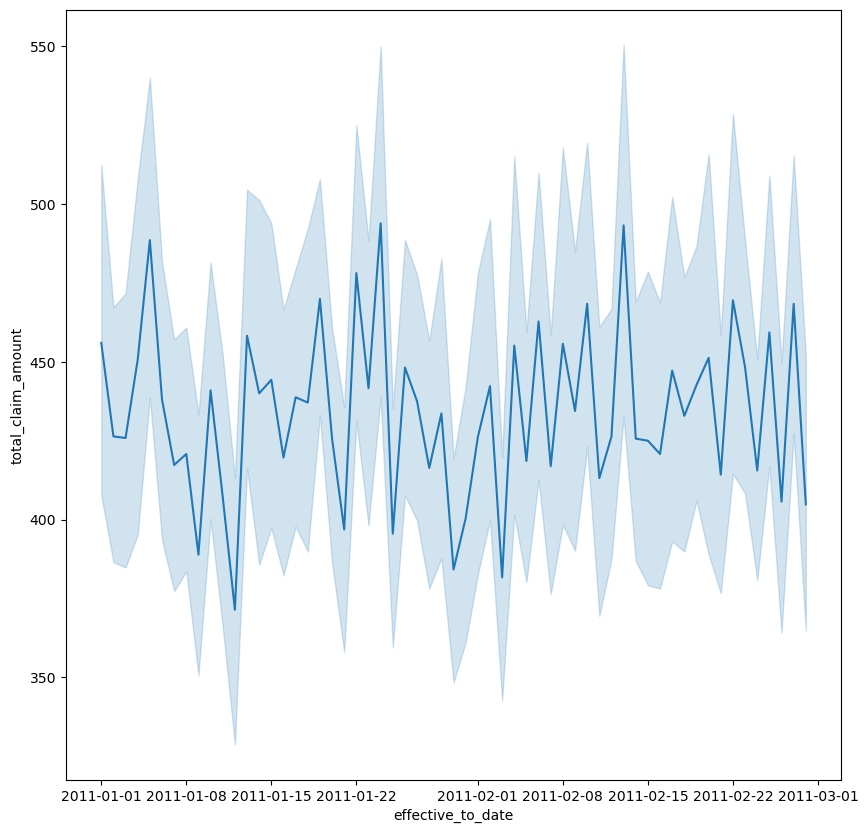

In [26]:
#3

fig,ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=customer_df, x = 'effective_to_date', y = 'total_claim_amount')
plt.show()

In [27]:
time_analysis_df = customer_df[['effective_to_date','total_claim_amount']]
time_analysis_df

,effective_to_date,total_claim_amount
0,2011-02-24,384.811147
1,2011-01-31,1131.464935
2,2011-02-19,566.472247
3,2011-01-20,529.881344
4,2011-02-03,138.130879
...,...,...
9129,2011-02-10,198.234764
9130,2011-02-12,379.200000
9131,2011-02-06,790.784983
9132,2011-02-03,691.200000


In [28]:
time_analysis_df_1 = customer_df.groupby(['effective_to_date']).agg({'total_claim_amount':sum})
time_analysis_df_1

,total_claim_amount
effective_to_date,
2011-01-01,67480.593660
2011-01-02,68212.093124
2011-01-03,75794.120050
2011-01-04,51824.370553
2011-01-05,81574.155909
2011-01-06,62635.446419
2011-01-07,63008.305663
2011-01-08,62691.475449
2011-01-09,56773.816418


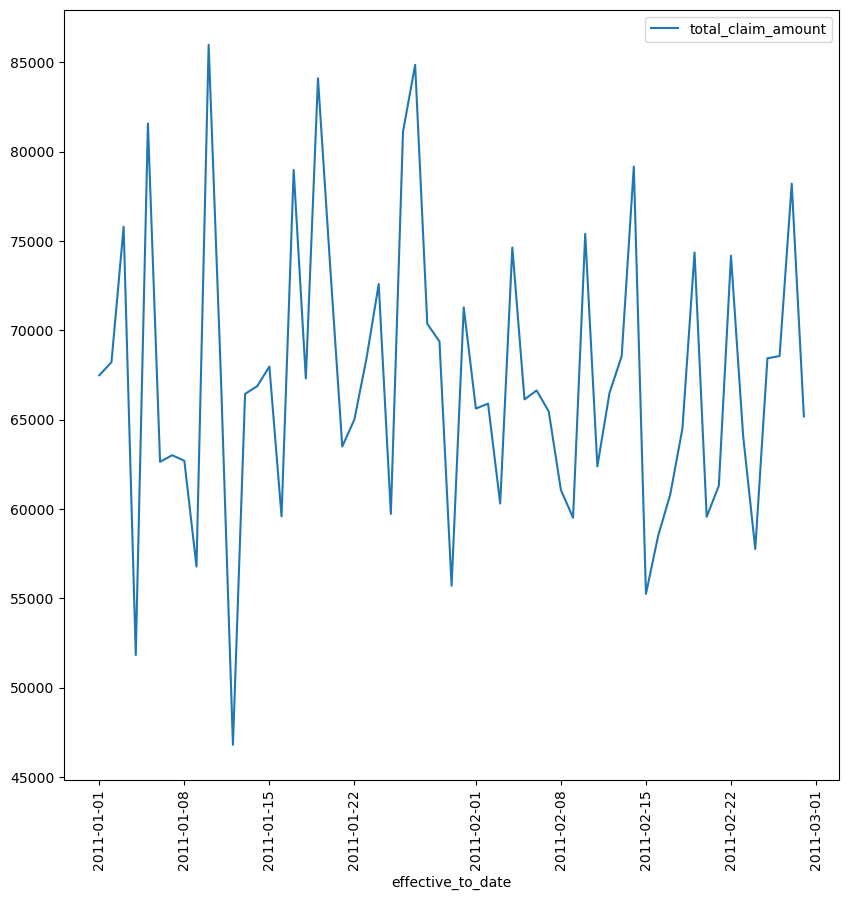

In [29]:
fig,ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=time_analysis_df_1)
plt.xticks(rotation=90)
plt.show()

In [30]:
#4

new_time_df = pd.DataFrame(customer_df['effective_to_date'])
new_time_df['day'] = new_time_df['effective_to_date'].apply(lambda x: x.weekday())
new_time_df['day_name'] = new_time_df['effective_to_date'].apply(lambda x: x.day_name())
new_time_df['week'] = new_time_df['effective_to_date'].apply(lambda x: x.isocalendar().week)
new_time_df['month'] = new_time_df['effective_to_date'].apply(lambda x: x.month_name())
new_time_df['total_claim_amount'] = customer_df['total_claim_amount']
new_time_df = new_time_df.drop(['effective_to_date'], axis = 1)
new_time_df

,day,day_name,week,month,total_claim_amount
0,3,Thursday,8,February,384.811147
1,0,Monday,5,January,1131.464935
2,5,Saturday,7,February,566.472247
3,3,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879
...,...,...,...,...,...
9129,3,Thursday,6,February,198.234764
9130,5,Saturday,6,February,379.200000
9131,6,Sunday,5,February,790.784983
9132,3,Thursday,5,February,691.200000


In [31]:
#5

claim_amount_day_name = new_time_df.groupby(['day_name']).agg({'total_claim_amount':sum})
claim_amount_day_name['total_claim_amount']= claim_amount_day_name['total_claim_amount'].apply(lambda x: round(x,2))
claim_amount_day_name

,total_claim_amount
day_name,
Friday,533658.79
Monday,655689.71
Saturday,608060.10
Sunday,581655.66
Thursday,541820.80
Tuesday,502518.93
Wednesday,541563.05


In [32]:
list_of_correct_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
claim_amount_day_name = claim_amount_day_name.reindex(index=list_of_correct_days)
claim_amount_day_name

,total_claim_amount
day_name,
Monday,655689.71
Tuesday,502518.93
Wednesday,541563.05
Thursday,541820.80
Friday,533658.79
Saturday,608060.10
Sunday,581655.66


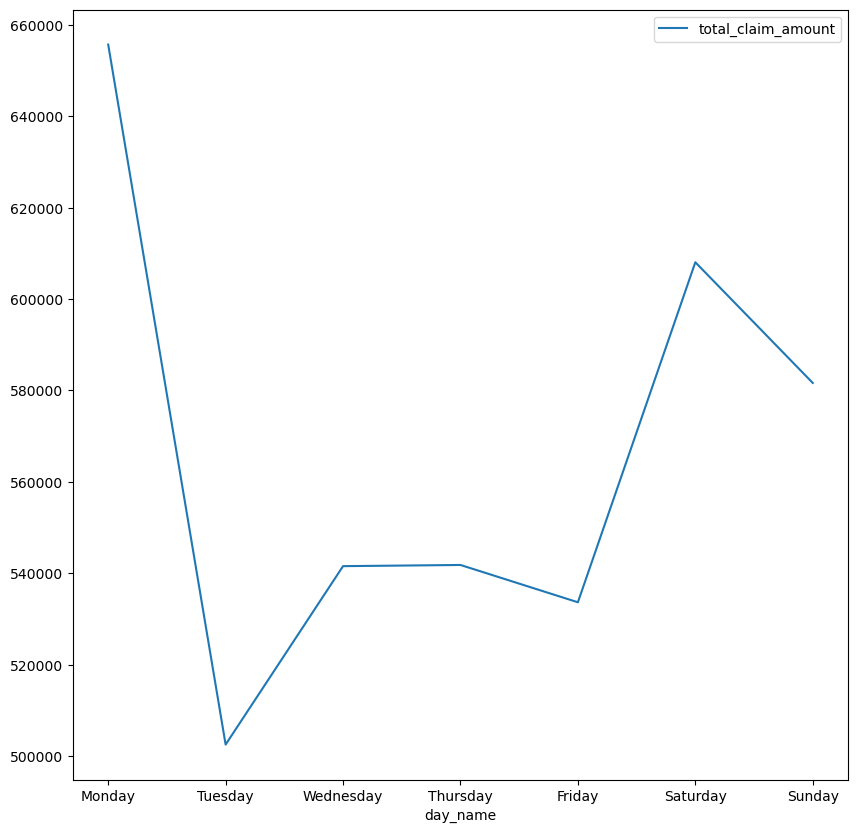

In [33]:
#6

fig,ax = plt.subplots(figsize=(10,10))
sns.lineplot(data = claim_amount_day_name)
plt.show()

#The result  using day of the week is the same, since we keep in mind that
    # day 0 correspond to monday.

In [34]:
#7

total_claims_day_name = new_time_df.groupby(['day_name']).agg({'total_claim_amount':'count'})
total_claims_day_name['total_claim_amount']= total_claims_day_name['total_claim_amount'].apply(lambda x: round(x,2))
total_claims_day_name = total_claims_day_name.reindex(index=list_of_correct_days)
total_claims_day_name = total_claims_day_name.rename(columns = {'total_claim_amount': 'total_claims_number'})
total_claims_day_name


,total_claims_number
day_name,
Monday,1530
Tuesday,1162
Wednesday,1221
Thursday,1249
Friday,1245
Saturday,1397
Sunday,1330


In [35]:
#8

median_claims_amount_day_name = new_time_df.groupby(['day_name']).agg({'total_claim_amount': np.median})
median_claims_amount_day_name['total_claim_amount']= median_claims_amount_day_name['total_claim_amount'].apply(lambda x: round(x,2))
median_claims_amount_day_name = median_claims_amount_day_name.rename(columns = {'total_claim_amount': 'median_claims_number'})
median_claims_amount_day_name = median_claims_amount_day_name.sort_values('median_claims_number')
median_claims_amount_day_name


,median_claims_number
day_name,
Friday,371.80
Tuesday,378.49
Saturday,379.20
Sunday,383.72
Monday,385.74
Wednesday,392.24
Thursday,395.33


In [36]:
df1 = median_claims_amount_day_name.reset_index()
df1
#sns.barplot(data=df1)
#plt.show()

,day_name,median_claims_number
0,Friday,371.80
1,Tuesday,378.49
2,Saturday,379.20
3,Sunday,383.72
4,Monday,385.74
5,Wednesday,392.24
6,Thursday,395.33


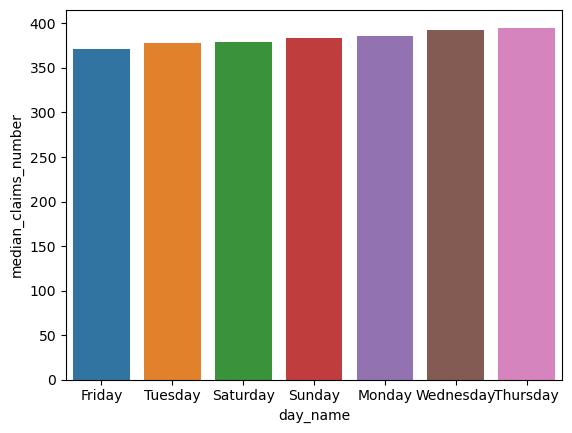

In [37]:
sns.barplot(data=df1, x = 'day_name', y='median_claims_number')
plt.show()

In [38]:
#10 
#Regarding the number of claims, we can see that there is no relation with the weekday, 
    #since the number of claims don't change to much.
#in other way, the total claimed amount is much higher at mondays then it decreases a lot to 
    #increase again on fridays until saturdays


In [39]:
#11

total_claim_amount_months = new_time_df.groupby(['month']).agg({'total_claim_amount':sum})
total_claim_amount_months['total_claim_amount'] = total_claim_amount_months['total_claim_amount'].apply(lambda x: round(x,2))
list_of_correct_values = ['January','February']
total_claim_amount_months = total_claim_amount_months.reindex(index = list_of_correct_values) 
total_claim_amount_months

,total_claim_amount
month,
January,2117142.86
February,1847824.19


In [40]:
#12

#No, it's not possible because we just only have 2 months, so there is no enough data
 #to take an accurate analysis

In [41]:
numerical_continous

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [42]:
numerical_continous.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,99.000000,2893.239678


In [43]:
#13

def clean_outliers_columns(col,df):
    mean = col.mean()
    std = col.std()
    a = mean + 3*std
    b = mean -3*std
    #df[col > a]
    return  df[(col < a) & (col > b)]
   

In [44]:
df1 = numerical_continous.copy()
clean_outliers_columns(df1['monthly_premium_auto'],df1)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [45]:
#14

dfx = numerical_continous.copy()

df1 = clean_outliers_columns(dfx['customer_lifetime_value'],dfx)
df2 = clean_outliers_columns(df1['income'],df1)
df3 = clean_outliers_columns(df2['monthly_premium_auto'],df2)
df4 = clean_outliers_columns(df3['months_since_policy_inception'],df3)
continous_cleaned_df = clean_outliers_columns(df4['total_claim_amount'],df4)
continous_cleaned_df.shape


#df2=numerical_continous.copy()
#list2 = list(df2.columns)
#index_list = []

#for i in columns:
    #df = clean_outliers_columns(df2[i],df2)
    #df_index = list(df.index)
    #index_list.append(df_index)
    #continous_clean_df = df2.iloc[index_list]
    

(8575, 5)

In [46]:
#15

discrete_df = numerical_discretes
time_df = new_time_df.drop('total_claim_amount', axis = 1)

final_df = pd.concat([continous_cleaned_df, discrete_df, categorical_df, time_df],axis=1)
final_df = final_df.dropna().reset_index(drop=True)
final_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,...,Married,L3,Offer1,Agent,Two-Door Car,Medsize,3,Thursday,8,February
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,...,Single,L3,Offer3,Agent,Four-Door Car,Medsize,0,Monday,5,January
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,...,Married,L3,Offer1,Agent,Two-Door Car,Medsize,5,Saturday,7,February
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,...,Married,L2,Offer1,Call Center,SUV,Medsize,3,Thursday,3,January
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,...,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,23405.987980,71941.0,73.0,89.0,198.234764,18,0,2,California,No,...,Married,L1,Offer2,Web,Four-Door Car,Medsize,3,Thursday,6,February
8571,3096.511217,21604.0,79.0,28.0,379.200000,14,0,1,California,Yes,...,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,5,Saturday,6,February
8572,8163.890428,0.0,85.0,37.0,790.784983,9,3,2,California,No,...,Single,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday,5,February
8573,7524.442436,21941.0,96.0,3.0,691.200000,34,0,3,California,No,...,Married,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday,5,February


In [47]:
#16

a = np.arange(0,4,1)
b = np.arange(5,25,1)
final_df = final_df.iloc[:,np.concatenate([a, b, [4]])]
final_df = final_df.drop(['day_name','week','month'], axis = 1) 
final_df
#we only keep the 'day' here since it seems that have some influence on the target 'total_claim_amount'
    # we drop the name_day so in the future we don't have to encode that column

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,No,Basic,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,3,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,No,Extended,...,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,0,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,No,Premium,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,5,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,No,Basic,...,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,3,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,No,Basic,...,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,23405.987980,71941.0,73.0,89.0,18,0,2,California,No,Basic,...,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize,3,198.234764
8571,3096.511217,21604.0,79.0,28.0,14,0,1,California,Yes,Extended,...,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,5,379.200000
8572,8163.890428,0.0,85.0,37.0,9,3,2,California,No,Extended,...,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize,6,790.784983
8573,7524.442436,21941.0,96.0,3.0,34,0,3,California,No,Extended,...,M,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large,3,691.200000


In [48]:
final_df['response'].value_counts(dropna=False)

No     7339
Yes    1236
Name: response, dtype: int64

In [49]:
#17

final_df['response'].value_counts(dropna=False)

def clean_response(x):
    
    if 'Yes' in x:
        return 1
    else:
        return 0

final_df['response'] = final_df['response'].apply(clean_response)

final_df['response'].value_counts()


0    7339
1    1236
Name: response, dtype: int64

In [50]:
final_df['education'].value_counts()

Bachelor                2585
College                 2531
High School or Below    2441
Master                   690
Doctor                   328
Name: education, dtype: int64

In [51]:
#18

def clean_education(x):
    
    if x in ['Master','Doctor']:
        return 'Graduate'
    else:
        return x
    
final_df['education'] = final_df['education'].apply(clean_education)

final_df['education'].value_counts()



Bachelor                2585
College                 2531
High School or Below    2441
Graduate                1018
Name: education, dtype: int64

In [52]:
#19

def clean_employment(x):
    
    if x in ['Medical Leave','Disabled','Retired']:
        return 'Inactive'
    else:
        return x
    
final_df['employment_status'] = final_df['employment_status'].apply(clean_employment)

final_df['employment_status'].value_counts()


Employed      5384
Unemployed    2127
Inactive      1064
Name: employment_status, dtype: int64

In [53]:
final_df['gender'].value_counts()

F    4383
M    4192
Name: gender, dtype: int64

In [54]:
#20

def clean_gender(x):
    
    if 'M' in x:
        return 0
    else:
        return 1
    
final_df['gender'] = final_df['gender'].apply(clean_gender)

final_df['gender'].value_counts()


1    4383
0    4192
Name: gender, dtype: int64

In [55]:
final_df['vehicle_class'].value_counts()

Four-Door Car    4577
Two-Door Car     1869
SUV              1627
Sports Car        430
Luxury Car         41
Luxury SUV         31
Name: vehicle_class, dtype: int64

In [56]:
#21

def clean_vehicle_class(x):
    
    if x in ['Sports Car','Luxury Car','Luxury SUV']:
        return 'Luxury'
    else:
        return x

final_df['vehicle_class'] = final_df['vehicle_class'].apply(clean_vehicle_class)

final_df['vehicle_class'].value_counts()

Four-Door Car    4577
Two-Door Car     1869
SUV              1627
Luxury            502
Name: vehicle_class, dtype: int64

In [57]:
final_df['coverage'].value_counts()

Basic       5353
Extended    2541
Premium      681
Name: coverage, dtype: int64

In [58]:
#22

def encode_coverage(x):
    
    if 'Premium' in x:
        return 2
    elif 'Extended' in x:
        return 1
    else:
        return 0

final_df['coverage'] = final_df['coverage'].apply(encode_coverage)

final_df['coverage'].value_counts()

0    5353
1    2541
2     681
Name: coverage, dtype: int64

In [59]:
final_df['employment_status'].value_counts()

Employed      5384
Unemployed    2127
Inactive      1064
Name: employment_status, dtype: int64

In [60]:
#23

def encode_employment(x):
    
    if 'Employed' in x:
        return 2
    elif 'Inactive' in x:
        return 1
    else:
        return 0

final_df['employment_status'] = final_df['employment_status'].apply(encode_employment)

final_df['employment_status'].value_counts()

2    5384
0    2127
1    1064
Name: employment_status, dtype: int64

In [61]:
final_df['location_code'].value_counts()

Suburban    5342
Rural       1710
Urban       1523
Name: location_code, dtype: int64

In [62]:
#24

def encode_location_code(x):
    
    if 'Urban' in x:
        return 2
    elif 'Suburban' in x:
        return 1
    else:
        return 0

final_df['location_code'] = final_df['location_code'].apply(encode_location_code)

final_df['location_code'].value_counts()

1    5342
0    1710
2    1523
Name: location_code, dtype: int64

In [63]:
final_df['vehicle_size'].value_counts()

Medsize    6033
Small      1644
Large       898
Name: vehicle_size, dtype: int64

In [64]:
#25

def encode_vehicle_size(x):
    
    if 'Large' in x:
        return 2
    elif 'Medsize' in x:
        return 1
    else:
        return 0

final_df['vehicle_size'] = final_df['vehicle_size'].apply(encode_vehicle_size)

final_df['vehicle_size'].value_counts()

1    6033
0    1644
2     898
Name: vehicle_size, dtype: int64

In [65]:
final_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,0,0,...,1,1,Married,L3,Offer1,Agent,Two-Door Car,1,3,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,0,1,...,1,1,Single,L3,Offer3,Agent,Four-Door Car,1,0,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,0,2,...,1,1,Married,L3,Offer1,Agent,Two-Door Car,1,5,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,0,0,...,0,1,Married,L2,Offer1,Call Center,SUV,1,3,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,0,0,...,0,0,Single,L1,Offer1,Agent,Four-Door Car,1,3,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,23405.987980,71941.0,73.0,89.0,18,0,2,California,0,0,...,0,2,Married,L1,Offer2,Web,Four-Door Car,1,3,198.234764
8571,3096.511217,21604.0,79.0,28.0,14,0,1,California,1,1,...,1,1,Divorced,L3,Offer1,Branch,Four-Door Car,1,5,379.200000
8572,8163.890428,0.0,85.0,37.0,9,3,2,California,0,1,...,0,1,Single,L2,Offer1,Branch,Four-Door Car,1,6,790.784983
8573,7524.442436,21941.0,96.0,3.0,34,0,3,California,0,1,...,0,1,Married,L2,Offer3,Branch,Four-Door Car,2,3,691.200000


In [66]:
#26

catnominal_col_df = final_df.loc[:,['state','response','gender','marital_status'\
                                                ,'policy','renew_offer_type','sales_channel','vehicle_class','day']]
catnominal_col_df

,state,response,gender,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,day
0,Washington,0,1,Married,L3,Offer1,Agent,Two-Door Car,3
1,Arizona,0,1,Single,L3,Offer3,Agent,Four-Door Car,0
2,Nevada,0,1,Married,L3,Offer1,Agent,Two-Door Car,5
3,California,0,0,Married,L2,Offer1,Call Center,SUV,3
4,Washington,0,0,Single,L1,Offer1,Agent,Four-Door Car,3
...,...,...,...,...,...,...,...,...,...
8570,California,0,0,Married,L1,Offer2,Web,Four-Door Car,3
8571,California,1,1,Divorced,L3,Offer1,Branch,Four-Door Car,5
8572,California,0,0,Single,L2,Offer1,Branch,Four-Door Car,6
8573,California,0,0,Married,L2,Offer3,Branch,Four-Door Car,3


In [67]:
#27
col_list = list(catnominal_col_df.columns)
levels = []
for col_list in catnominal_col_df:
    list_uniq = list(catnominal_col_df[col_list].unique())
    levels.append(list_uniq)

len(levels) == len(list(catnominal_col_df.columns))

levels

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
 [0, 1],
 [1, 0],
 ['Married', 'Single', 'Divorced'],
 ['L3', 'L2', 'L1'],
 ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
 ['Agent', 'Call Center', 'Web', 'Branch'],
 ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'],
 [3, 0, 5, 1, 2, 6, 4]]

In [68]:
#28

levels1=[]
for i in range(len(levels)):
    sorted_list= list(np.sort(levels[i]))
    levels1.append(sorted_list)
levels1    
# one hot encoder was giving error becaus some of the list's weren't ordered

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop = 'first', categories = levels1)
data_enc = encoder.fit_transform(catnominal_col_df).toarray()
data_enc = pd.DataFrame(data_enc, columns = encoder.get_feature_names_out())
data_enc

,state_California,state_Nevada,state_Oregon,state_Washington,response_1,gender_1,marital_status_Married,marital_status_Single,policy_L2,policy_L3,...,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,day_1,day_2,day_3,day_4,day_5,day_6
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8571,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8572,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8573,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Lab Comparing regression models

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

In [70]:
final_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,0,0,...,1,1,Married,L3,Offer1,Agent,Two-Door Car,1,3,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,0,1,...,1,1,Single,L3,Offer3,Agent,Four-Door Car,1,0,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,0,2,...,1,1,Married,L3,Offer1,Agent,Two-Door Car,1,5,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,0,0,...,0,1,Married,L2,Offer1,Call Center,SUV,1,3,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,0,0,...,0,0,Single,L1,Offer1,Agent,Four-Door Car,1,3,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,23405.987980,71941.0,73.0,89.0,18,0,2,California,0,0,...,0,2,Married,L1,Offer2,Web,Four-Door Car,1,3,198.234764
8571,3096.511217,21604.0,79.0,28.0,14,0,1,California,1,1,...,1,1,Divorced,L3,Offer1,Branch,Four-Door Car,1,5,379.200000
8572,8163.890428,0.0,85.0,37.0,9,3,2,California,0,1,...,0,1,Single,L2,Offer1,Branch,Four-Door Car,1,6,790.784983
8573,7524.442436,21941.0,96.0,3.0,34,0,3,California,0,1,...,0,1,Married,L2,Offer3,Branch,Four-Door Car,2,3,691.200000


In [71]:
#1

X = final_df.drop(['total_claim_amount'], axis = 1)
y = final_df['total_claim_amount']

In [72]:
#2

X_train, X_test, y_train, y_test  = train_test_split (X,y, test_size = 0.30, random_state = 31 )


In [73]:
X_test.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'months_since_last_claim',
       'number_of_open_complaints', 'number_of_policies', 'state', 'response',
       'coverage', 'education', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'day'],
      dtype='object')

In [79]:
#3

# here i'm not sure but we cant use the previous work to this split, because we don't know it the Xtrain or X test have the same features that we have on our data frames generated in the last lab
    # so, to have 100% sure we'll do the process from the beginning

    
# here is used iloc instead of select_dtypes because since we already manual encode some categorical variables before, and for that reason
    # select_dtypes don't recognize them as a categorical columns
    
X_train.columns
X_train_num = X_train.loc[:,['customer_lifetime_value', 'income', 'monthly_premium_auto','months_since_policy_inception',\
                               'months_since_last_claim','number_of_open_complaints', 'number_of_policies']]

X_test.columns
X_test_num = X_test.loc[:,['customer_lifetime_value', 'income', 'monthly_premium_auto','months_since_policy_inception',\
                             'months_since_last_claim','number_of_open_complaints', 'number_of_policies']]

X_train_cat = X_train.loc[:,['state', 'response','coverage', 'education', 'employment_status', 'gender', 'location_code',\
       'marital_status', 'policy', 'renew_offer_type', 'sales_channel','vehicle_class', 'vehicle_size', 'day']]

X_test_cat = X_test.loc[:,['state', 'response','coverage', 'education', 'employment_status', 'gender', 'location_code',\
       'marital_status', 'policy', 'renew_offer_type', 'sales_channel','vehicle_class', 'vehicle_size', 'day']]

In [80]:
#4

encoder = OneHotEncoder(drop = 'first')
X_train_cat_encoded = encoder.fit_transform(X_train_cat).toarray()
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns = encoder.get_feature_names_out())

X_test_cat_encoded = encoder.fit_transform(X_test_cat).toarray()
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, columns = encoder.get_feature_names_out())

X_train_cat_encoded
X_test_cat_encoded

,state_California,state_Nevada,state_Oregon,state_Washington,response_1,coverage_1,coverage_2,education_College,education_Graduate,education_High School or Below,...,vehicle_class_SUV,vehicle_class_Two-Door Car,vehicle_size_1,vehicle_size_2,day_1,day_2,day_3,day_4,day_5,day_6
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2569,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2570,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2571,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [82]:
#5

transformer = PowerTransformer()
transformer.fit(X_train_num)
x_normalized = transformer.transform(X_train_num)
X_train_num_transf = pd.DataFrame(x_normalized, columns = X_train_num.columns)
X_train_num_transf



,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies
0,1.254780,-1.662875,1.312075,-0.403151,-0.698167,-0.508609,-0.066679
1,-1.502490,0.235429,-1.144354,1.275008,-0.135818,-0.508609,-1.134627
2,-1.758357,-1.662875,-1.541686,0.393123,0.245320,-0.508609,-1.134627
3,-0.076610,-1.662875,-0.071004,0.393123,-0.036060,1.921569,0.868793
4,-0.826154,0.180443,0.807702,0.295321,-0.698167,-0.508609,-1.134627
...,...,...,...,...,...,...,...
5997,-0.330862,0.901365,1.205773,1.100574,0.154228,-0.508609,-1.134627
5998,1.301769,1.000437,1.087640,0.295321,1.533074,2.011232,-0.066679
5999,0.654601,-1.662875,-0.127329,0.862053,-0.698167,-0.508609,-0.066679
6000,-0.330862,0.901365,1.205773,1.100574,0.154228,-0.508609,-1.134627


In [88]:
x_normalized = transformer.transform(X_test_num)
X_test_num_transf = pd.DataFrame(x_normalized, columns = X_test_num.columns)
X_test_num_transf

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies
0,-0.215250,0.896246,-1.144354,0.739978,-0.967315,2.023394,1.658115
1,0.866255,0.465699,1.312075,1.641510,1.192979,-0.508609,0.506547
2,-0.324084,0.703730,1.249617,1.188241,1.399949,-0.508609,-1.134627
3,-1.115593,1.020217,-0.185418,-0.255762,-0.828374,-0.508609,-1.134627
4,-0.249609,1.038877,-1.541686,-0.516907,-1.680526,-0.508609,1.306339
...,...,...,...,...,...,...,...
2568,-1.888305,-1.662875,-1.238045,1.558220,0.060520,-0.508609,-1.134627
2569,0.631238,0.795424,-0.802284,1.188241,-1.465593,-0.508609,-0.066679
2570,0.700636,0.800144,-0.648679,-0.365867,0.587530,-0.508609,-0.066679
2571,0.441767,0.971957,0.409774,-0.964393,0.060520,-0.508609,0.506547


In [89]:
#6

X_train_new = pd.concat([X_train_num_transf,X_train_cat_encoded], axis=1)
X_train_new

X_test_new = pd.concat([X_test_num_transf,X_test_cat_encoded], axis=1)
X_test_new

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,vehicle_class_SUV,vehicle_class_Two-Door Car,vehicle_size_1,vehicle_size_2,day_1,day_2,day_3,day_4,day_5,day_6
0,-0.215250,0.896246,-1.144354,0.739978,-0.967315,2.023394,1.658115,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.866255,0.465699,1.312075,1.641510,1.192979,-0.508609,0.506547,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.324084,0.703730,1.249617,1.188241,1.399949,-0.508609,-1.134627,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.115593,1.020217,-0.185418,-0.255762,-0.828374,-0.508609,-1.134627,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.249609,1.038877,-1.541686,-0.516907,-1.680526,-0.508609,1.306339,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,-1.888305,-1.662875,-1.238045,1.558220,0.060520,-0.508609,-1.134627,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2569,0.631238,0.795424,-0.802284,1.188241,-1.465593,-0.508609,-0.066679,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2570,0.700636,0.800144,-0.648679,-0.365867,0.587530,-0.508609,-0.066679,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2571,0.441767,0.971957,0.409774,-0.964393,0.060520,-0.508609,0.506547,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [92]:
#7

transformer = MinMaxScaler()
transformer.fit(X_train_new)
x_normalized = transformer.transform(X_train_new)
X_train_new_scaled = pd.DataFrame(x_normalized, columns = X_train_new.columns)
X_train_new_scaled


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,vehicle_class_SUV,vehicle_class_Two-Door Car,vehicle_size_1,vehicle_size_2,day_1,day_2,day_3,day_4,day_5,day_6
0,0.768989,0.000000,0.776334,0.453342,0.347162,0.000000,0.382401,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.156696,0.683148,0.108090,0.902013,0.502666,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.099877,0.000000,0.000000,0.666233,0.608060,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.473334,0.000000,0.400083,0.666233,0.530251,0.958363,0.717367,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.306886,0.663360,0.639125,0.640085,0.347162,0.000000,0.000000,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5997,0.416874,0.922800,0.747416,0.855376,0.582870,0.000000,0.000000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5998,0.779424,0.958454,0.715279,0.640085,0.964156,0.993722,0.382401,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5999,0.635710,0.000000,0.384760,0.791605,0.347162,0.000000,0.382401,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6000,0.416874,0.922800,0.747416,0.855376,0.582870,0.000000,0.000000,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
x_normalized = transformer.transform(X_test_new)
X_test_new_scaled = pd.DataFrame(x_normalized, columns = X_test_new.columns)
X_test_new_scaled

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,vehicle_class_SUV,vehicle_class_Two-Door Car,vehicle_size_1,vehicle_size_2,day_1,day_2,day_3,day_4,day_5,day_6
0,0.442547,0.920958,0.108090,0.758968,0.272736,0.998518,1.000000,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.682711,0.766016,0.776334,1.000000,0.870111,0.000000,0.587657,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.418379,0.851677,0.759343,0.878815,0.927343,0.000000,0.000000,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.242612,0.965572,0.368958,0.492748,0.311157,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.434917,0.972288,0.000000,0.422929,0.075515,0.000000,0.874039,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,0.071020,0.000000,0.082602,0.977732,0.556958,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2569,0.630522,0.884675,0.201146,0.878815,0.134950,0.000000,0.382401,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2570,0.645933,0.886374,0.242933,0.463310,0.702689,0.000000,0.382401,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2571,0.588447,0.948205,0.530873,0.303289,0.556958,0.000000,0.587657,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [140]:
#8

lm = LinearRegression()
lm.fit(X_train_new_scaled, y_train)
y_pred_train = lm.predict(X_train_new_scaled)
y_pred_test = lm.predict(X_test_new_scaled)


r2 train is: 0.7702767092015448
r2 test is: 0.7544103641751927


,error_metric,train_results,test_results
0,MAE,80.96,82.76
1,MSE,11324.1,12053.36
2,RMSE,106.41,109.79
3,MAPE,8096.3,8275.83
4,R2,0.77,0.75


In [142]:
#9

from sklearn.metrics import *

def error_metrics_df(y_train, y_pred_train,y_test, y_pred_test):
    names_metrics_train = ['MAE','MSE','RMSE','MAPE','R2']
    results_metrics_train = []
    results_metrics_test = []
    mae = mean_absolute_error(y_train, y_pred_train)
    mse = mean_squared_error(y_train, y_pred_train)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs(y_train - y_pred_train))*100
    r2 = r2_score(y_train, y_pred_train)
    maet = mean_absolute_error(y_test, y_pred_test)
    mset = mean_squared_error(y_test, y_pred_test)
    rmset = np.sqrt(mset)
    mapet = np.mean(np.abs(y_test - y_pred_test))*100
    r2t = r2_score(y_test, y_pred_test)
    results_metrics_train = [round(mae,2),round(mse,2), round(rmse,2), round(mape,2), round(r2,2)]
    results_metrics_test = [round(maet,2),round(mset,2), round(rmset,2), round(mapet,2), round(r2t,2)]
    error_metrics_df = pd.DataFrame([names_metrics_train,results_metrics_train,results_metrics_test]).T
    error_metrics_df.columns = ['error_metric','train_results','test_results']
    return error_metrics_df



In [143]:
#10

error_metrics_df(y_train, y_pred_train,y_test, y_pred_test)

,error_metric,train_results,test_results
0,MAE,80.96,82.76
1,MSE,11324.1,12053.36
2,RMSE,106.41,109.79
3,MAPE,8096.3,8275.83
4,R2,0.77,0.75


In [152]:
#11

def train_models(models,X_train,y_train):
    trained_models=[]
    for model in models:
        trained = model.fit(X_train,y_train)
        trained_models.append(trained)
    return trained_models
        


In [159]:
#12

models = [LinearRegression(),KNeighborsRegressor(),MLPRegressor()]

# for this exercise we only use X_train_num since the KNN model doesn't allow categorical variables
X_train = X_train_num_transf

trained_models = train_models(models,X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [161]:
#15

#Linear Regression


y_pred_train = trained_models[0].predict(X_train_num_transf)
y_pred_test = trained_models[0].predict(X_test_num_transf)

error_metrics_df(y_train, y_pred_train,y_test, y_pred_test)

,error_metric,train_results,test_results
0,MAE,134.78,135.59
1,MSE,30607.82,30794.42
2,RMSE,174.95,175.48
3,MAPE,13478.24,13558.7
4,R2,0.38,0.37


In [162]:
#KNN


y_pred_train = trained_models[1].predict(X_train_num_transf)
y_pred_test = trained_models[1].predict(X_test_num_transf)

error_metrics_df(y_train, y_pred_train,y_test, y_pred_test)

,error_metric,train_results,test_results
0,MAE,106.83,135.83
1,MSE,21445.76,33239.27
2,RMSE,146.44,182.32
3,MAPE,10682.94,13583.27
4,R2,0.56,0.32


In [163]:
#MLPRegression


y_pred_train = trained_models[2].predict(X_train_num_transf)
y_pred_test = trained_models[2].predict(X_test_num_transf)

error_metrics_df(y_train, y_pred_train,y_test, y_pred_test)

,error_metric,train_results,test_results
0,MAE,134.51,136.35
1,MSE,30083.37,30687.19
2,RMSE,173.45,175.18
3,MAPE,13451.12,13635.47
4,R2,0.39,0.37
